# **Detección de exoplanetas**


### Juan Manuel Falcón Ramírez


---

## **Preprocesado de datos**

En primer lugar, importamos las librerías a utilizar:

In [ ]:
#Importamos las librerías que vamos a utilizar

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

A continuación, cargamos los datos. En este caso, el fichero que contiene los datos de Kepler se llama "cumulative.csv".

In [ ]:
data = pd.read_csv("cumulative.csv")

### **Análisis exploratorio**

Realizamos un análisis exploratorio de nuestros datos para comprobar exactamente con qué tipo de información estamos trabajando.

In [ ]:
data.head(10)

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,7,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,8,10872983,K00756.03,Kepler-228 b,CONFIRMED,CANDIDATE,0.992,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
8,9,6721123,K00114.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-124.0,3.986,0.182,-0.098,1.958,0.322,-0.483,298.86435,42.151569,12.660
9,10,10910878,K00757.01,Kepler-229 c,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-83.0,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841


In [ ]:
data.shape

(9564, 50)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

In [ ]:
data.isnull().sum()

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff   

In [ ]:
data['koi_disposition'].value_counts()

FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: koi_disposition, dtype: int64

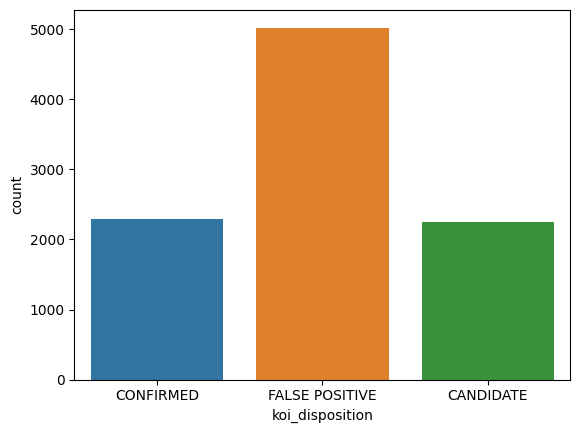

In [ ]:
sns.countplot(x='koi_disposition', data=data)
plt.show()

In [ ]:
data['koi_pdisposition'].value_counts()

FALSE POSITIVE    5068
CANDIDATE         4496
Name: koi_pdisposition, dtype: int64

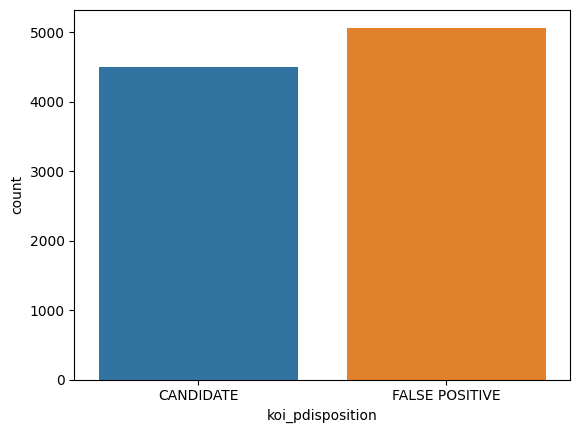

In [ ]:
sns.countplot(x='koi_pdisposition', data=data)
plt.show()

Eliminamos todas las variables que no sean características del objeto, de su tránsito, de su estrella o de su posición en el cielo. También eliminamos las variables incertidumbre de la temperatura de equilibrio porque están vacías.

In [ ]:
to_drop=['rowid','kepid','kepoi_name','kepler_name','koi_fpflag_nt',
         'koi_fpflag_ss','koi_fpflag_ec','koi_fpflag_co','koi_score',
         'koi_pdisposition','koi_tce_plnt_num','koi_tce_delivname',
         'koi_teq_err1','koi_teq_err2','koi_model_snr']

print("Variables eliminadas: ",to_drop[0:5],"\n                      ",to_drop[5:10],"\n                      ",to_drop[10:15],"\n")

df1 = data.drop(to_drop,axis=1)
print("Estructura del nuevo dataframe: ",df1.shape)

Variables eliminadas:  ['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_fpflag_nt'] 
                       ['koi_fpflag_ss', 'koi_fpflag_ec', 'koi_fpflag_co', 'koi_score', 'koi_pdisposition'] 
                       ['koi_tce_plnt_num', 'koi_tce_delivname', 'koi_teq_err1', 'koi_teq_err2', 'koi_model_snr'] 

Estructura del nuevo dataframe:  (9564, 35)


### **Tratamiento de valores nulos**

Empezamos trabajando con los valores nulos o missing values.

In [ ]:
print("Número de valores vacíos:\n")
for i in df1.columns:
    vac = sum(df1[i].isnull())
    if vac>0:
        print(i," ", vac)

Número de valores vacíos:

koi_period_err1   454
koi_period_err2   454
koi_time0bk_err1   454
koi_time0bk_err2   454
koi_impact   363
koi_impact_err1   454
koi_impact_err2   454
koi_duration_err1   454
koi_duration_err2   454
koi_depth   363
koi_depth_err1   454
koi_depth_err2   454
koi_prad   363
koi_prad_err1   363
koi_prad_err2   363
koi_teq   363
koi_insol   321
koi_insol_err1   321
koi_insol_err2   321
koi_steff   363
koi_steff_err1   468
koi_steff_err2   483
koi_slogg   363
koi_slogg_err1   468
koi_slogg_err2   468
koi_srad   363
koi_srad_err1   468
koi_srad_err2   468
koi_kepmag   1


In [ ]:
df1.describe()

,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9564.000000,9110.000000,9110.000000,9564.000000,9110.000000,9110.000000,9201.000000,9110.000000,9110.000000,9564.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,75.671358,0.002148,-0.002148,166.183251,0.009933,-0.009933,0.735105,1.959861,-0.332557,5.621606,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,1334.744046,0.008236,0.008236,67.918960,0.023097,0.023097,3.348832,9.421653,1.249828,6.471554,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,0.241843,0.000000,-0.172500,120.515914,0.000009,-0.569000,0.000000,0.000000,-59.320000,0.052000,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,2.733684,0.000005,-0.000276,132.761718,0.001240,-0.010500,0.197000,0.040000,-0.445000,2.437750,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,9.752831,0.000035,-0.000035,137.224595,0.004130,-0.004130,0.537000,0.193000,-0.207000,3.792600,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,40.715178,0.000276,-0.000005,170.694603,0.010500,-0.001240,0.889000,0.378000,-0.046000,6.276500,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,129995.778400,0.172500,0.000000,1472.522306,0.569000,-0.000009,100.806000,85.540000,0.000000,138.540000,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


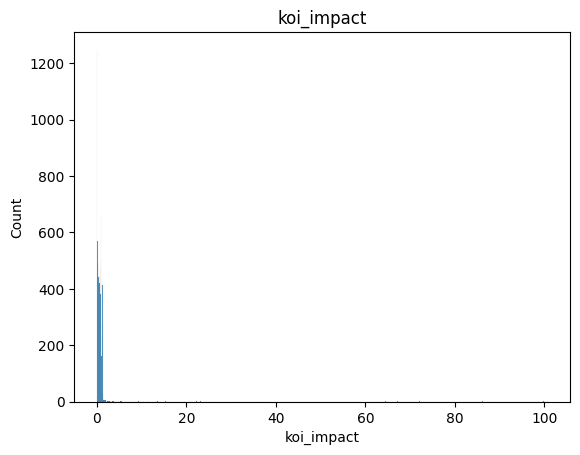

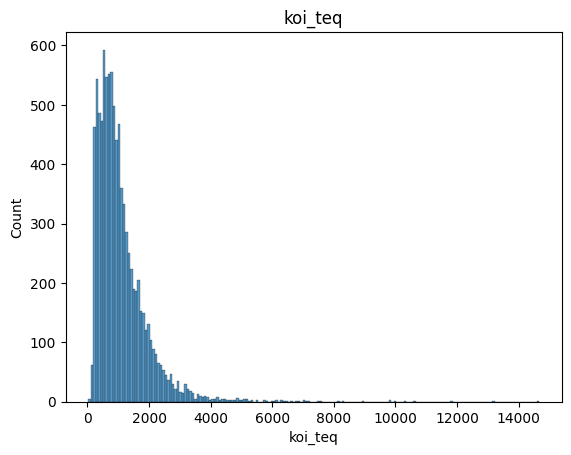

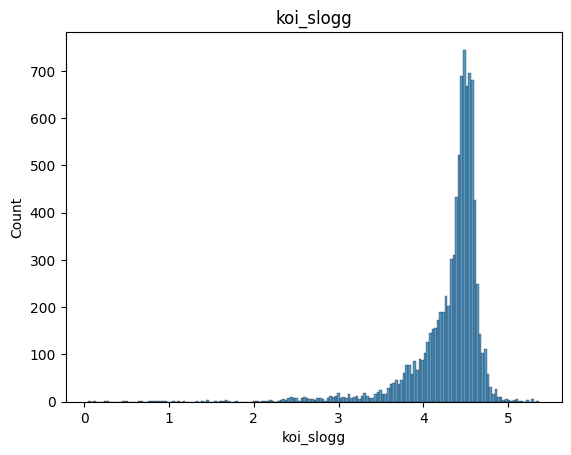

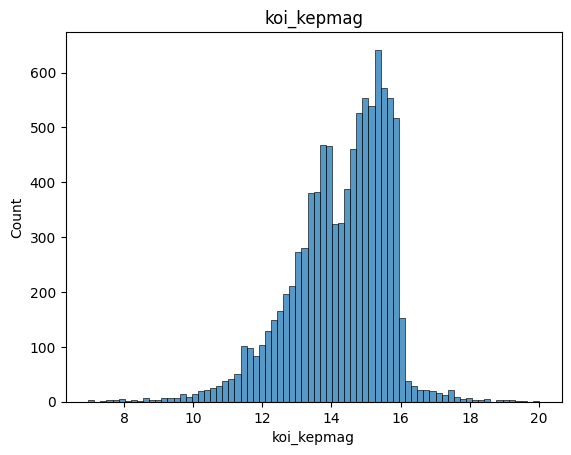

In [ ]:
noerror = ['koi_impact','koi_teq','koi_slogg','koi_kepmag']

for i in noerror:
    sns.histplot(df1[i])
    plt.title(i)
    plt.show()

Como hay pocos valores nulos y las variables no se centran en los extremos (no tenemos una forma de 'U' en las gráficas), podemos rellenar los valores faltantes con la media.

In [ ]:
obj = df1.select_dtypes(include=[object])   #Del análisis previo, sabemos que la variable koi_disposition no tenía valores nulos.

num = df1.select_dtypes(include=[np.float64,np.int64])

from sklearn.impute import SimpleImputer

relleno = SimpleImputer(strategy='mean')
df1_num = relleno.fit_transform(num)
df1_num = pd.DataFrame(df1_num,columns=num.columns)

df1_num.reset_index(drop=True, inplace=True)
obj.reset_index(drop=True, inplace=True)
df2 = pd.concat([df1_num, obj],axis=1)

In [ ]:
df2

,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition
0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,CONFIRMED
1,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,CONFIRMED
2,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,FALSE POSITIVE
3,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,FALSE POSITIVE
4,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,CONFIRMED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,...,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478,FALSE POSITIVE
9560,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,...,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082,FALSE POSITIVE
9561,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,...,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757,CANDIDATE
9562,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,...,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385,FALSE POSITIVE


In [ ]:
print("Número de valores vacíos:\n")
for i in df2.columns:
    vac = sum(df2[i].isnull())
    if vac>0:
        print(i," ", vac)

Número de valores vacíos:



### **Detección de outliers**

En un primer acercamiento, encontramos valores extraños en múltiples variables.

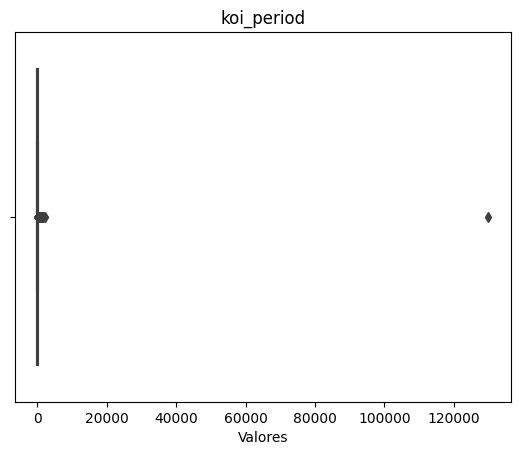

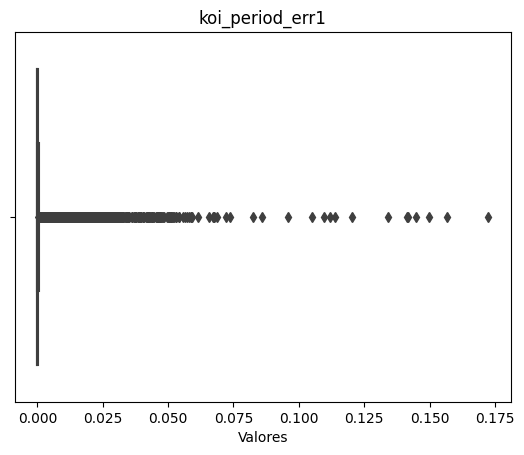

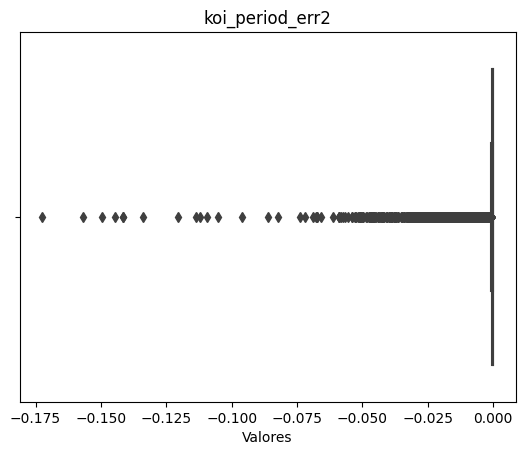

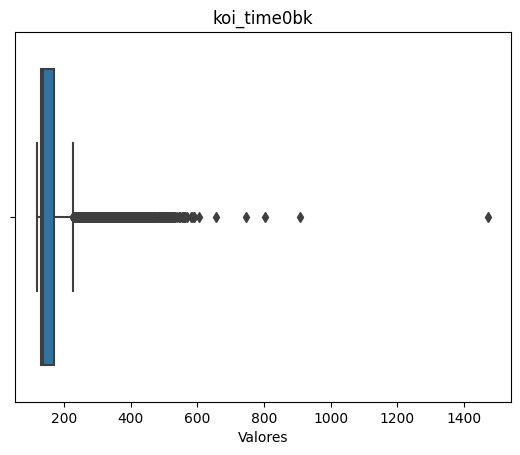

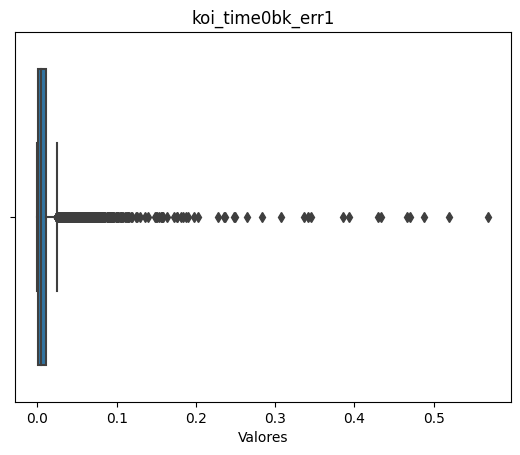

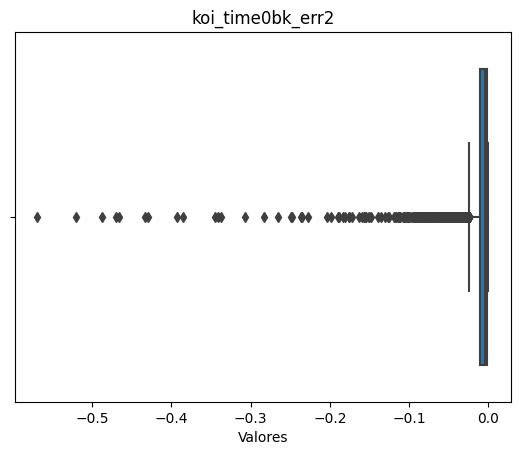

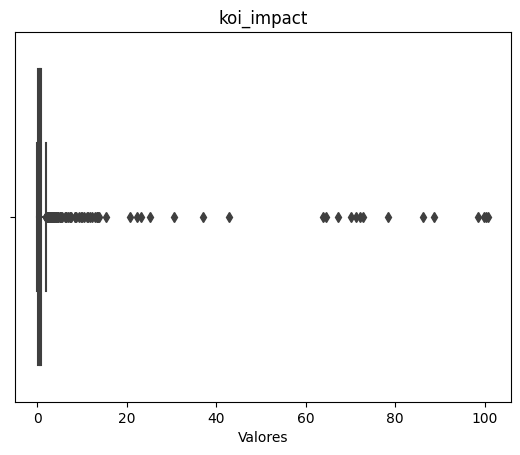

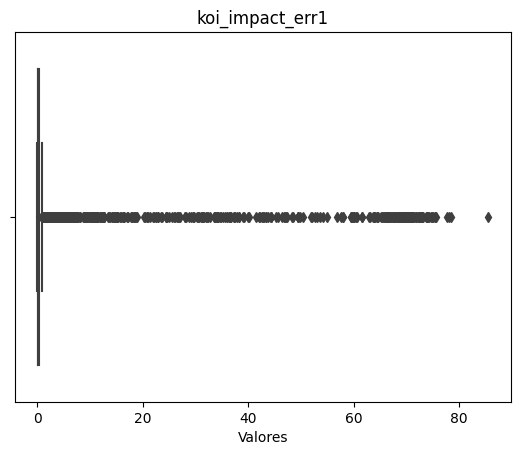

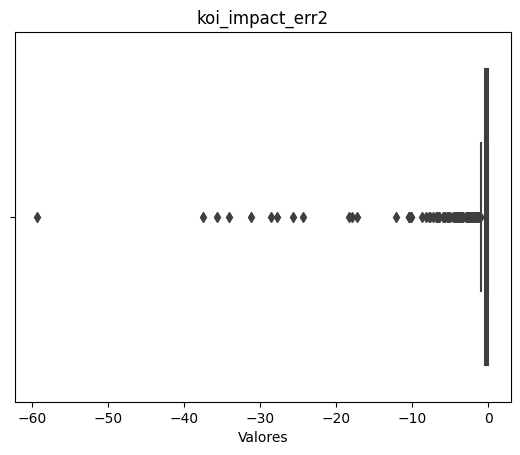

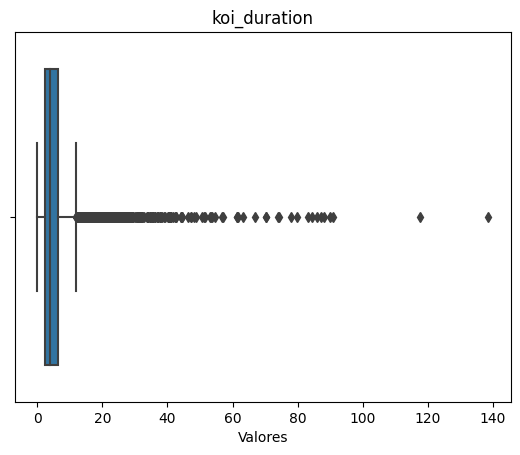

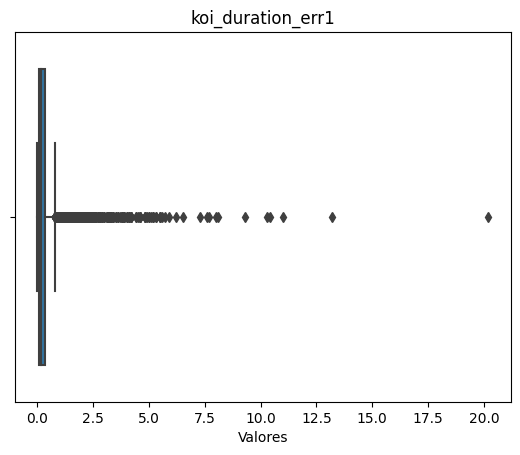

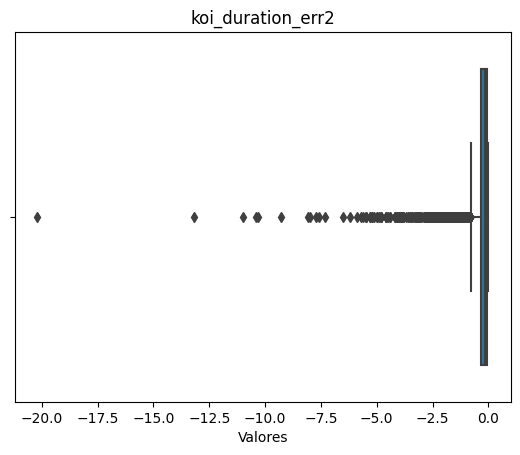

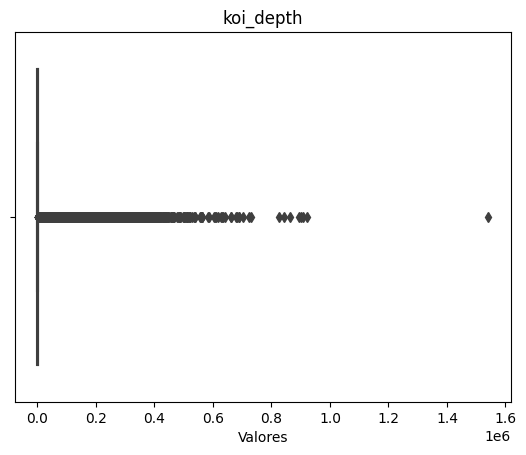

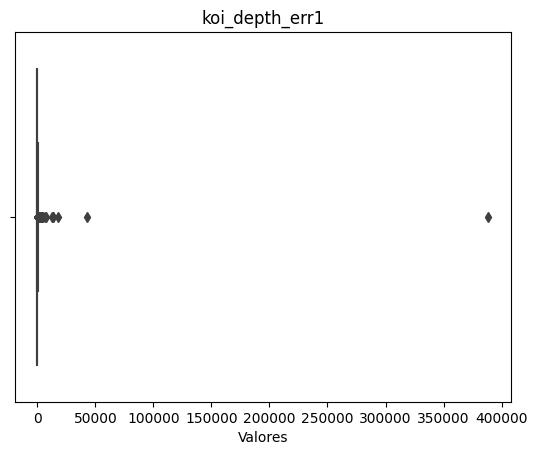

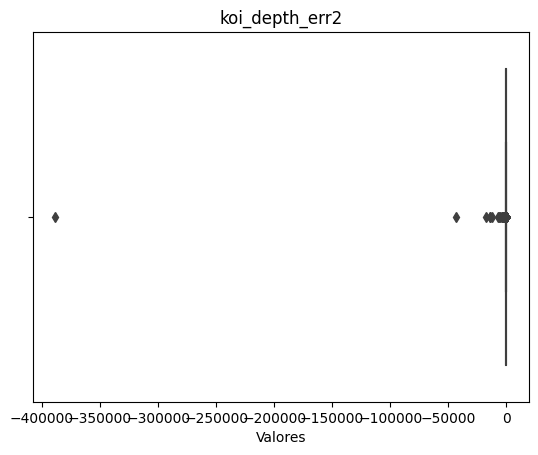

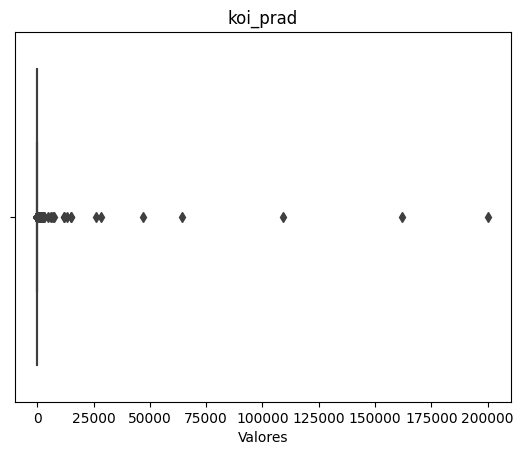

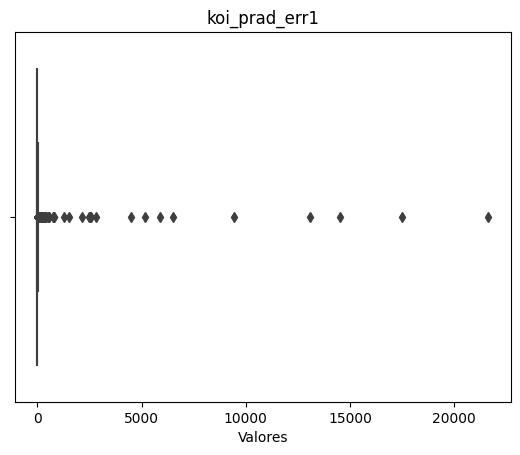

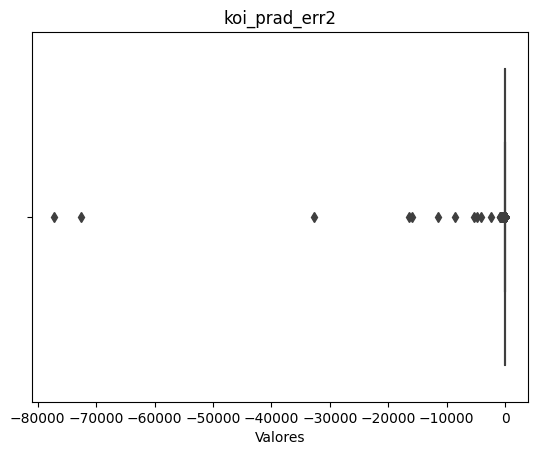

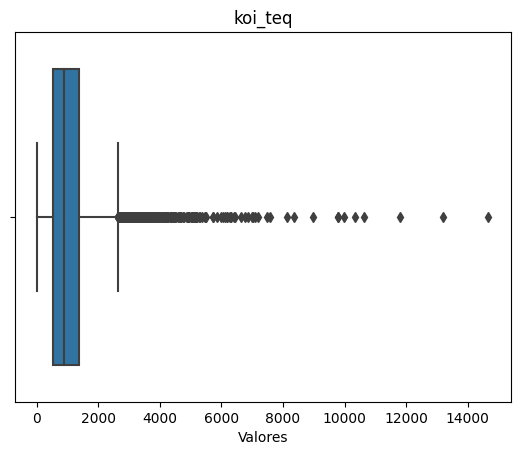

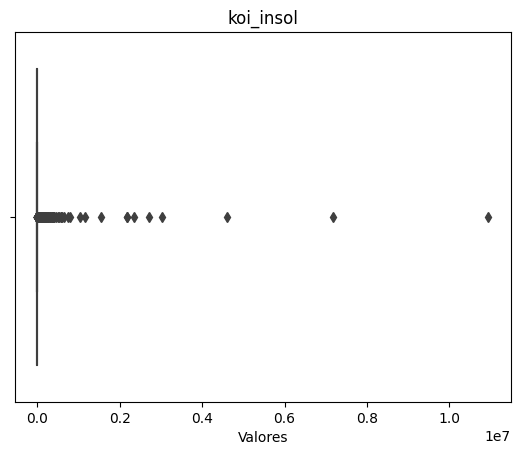

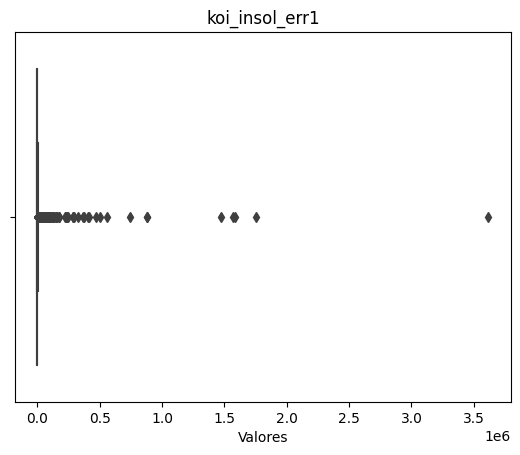

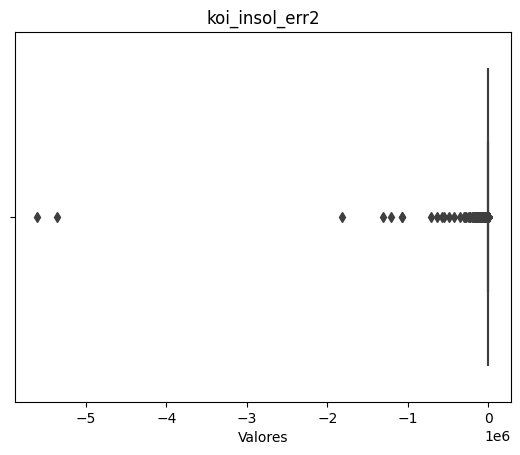

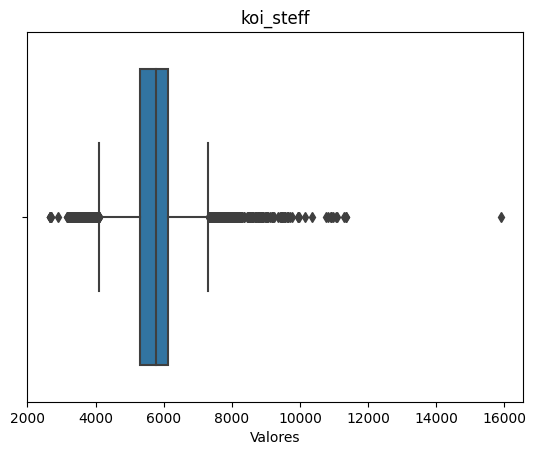

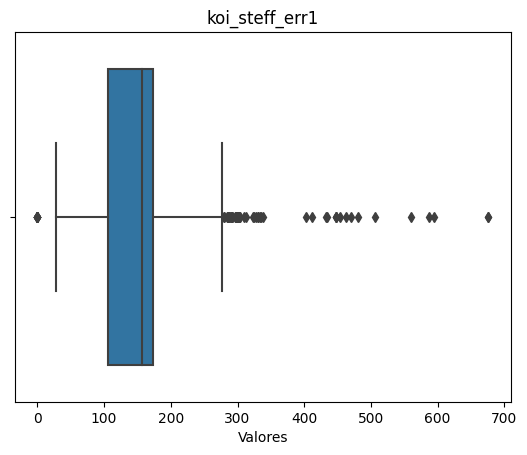

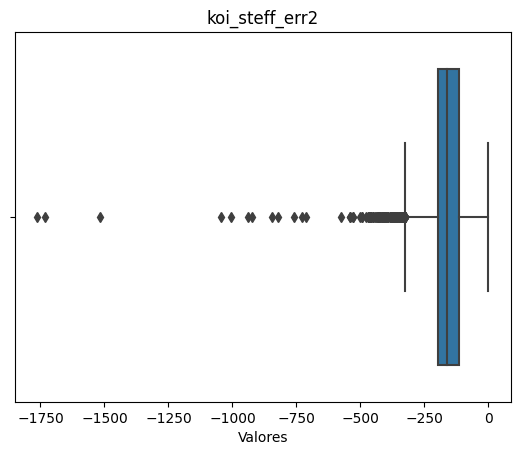

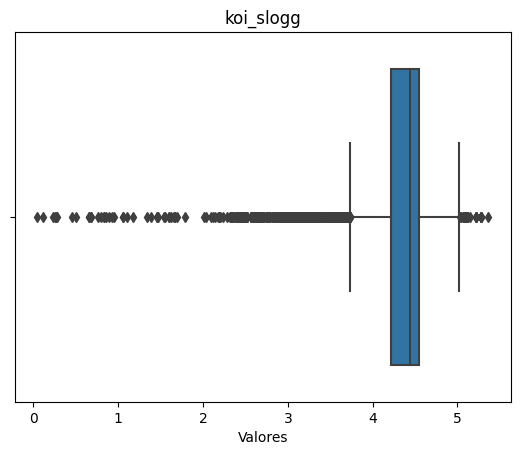

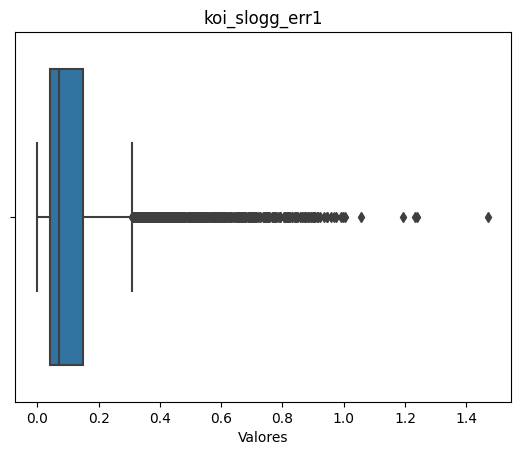

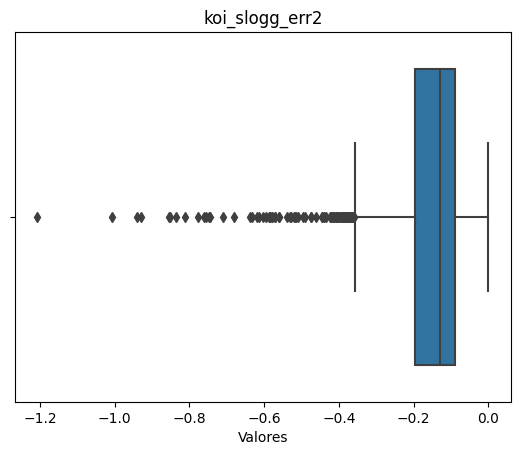

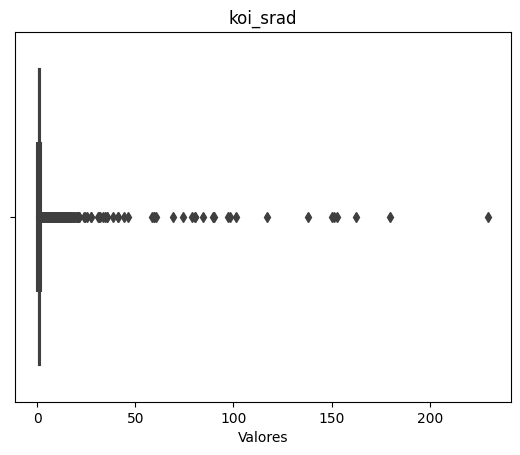

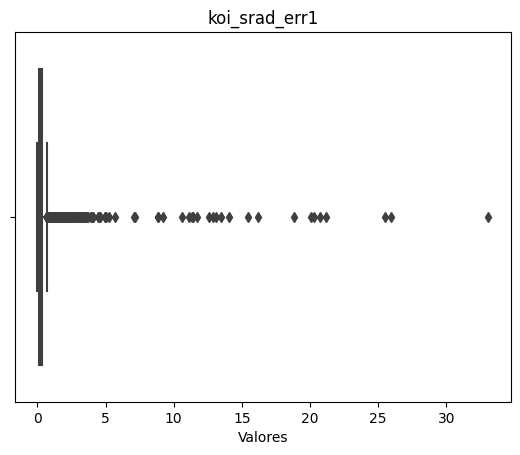

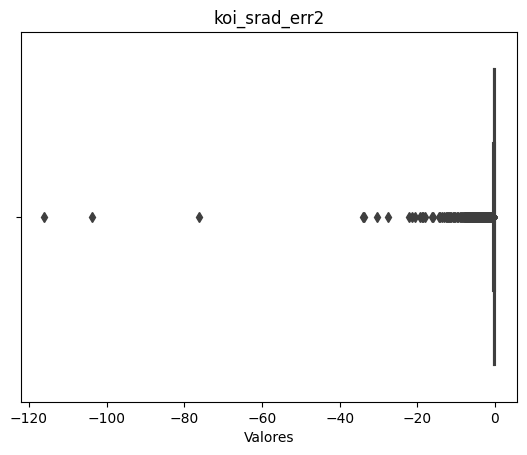

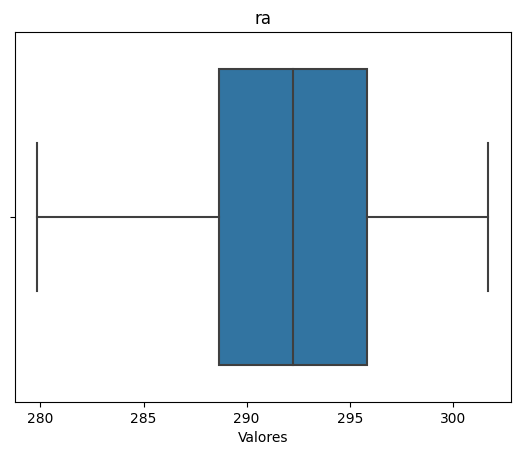

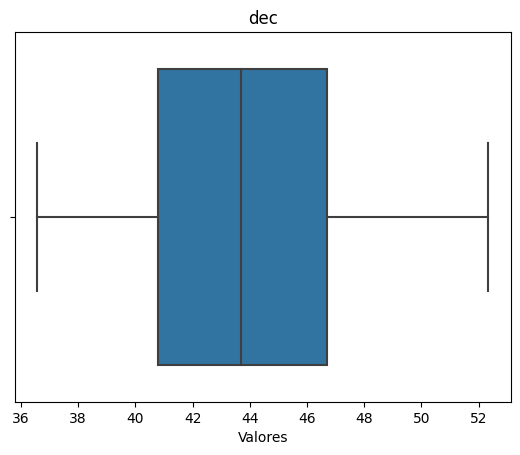

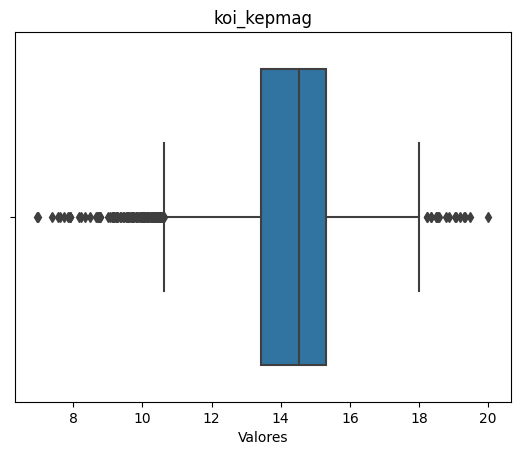

In [ ]:
for i in num.columns:
  sns.boxplot(data=num[i], x=num[i])
  plt.title(i)
  plt.xlabel('Valores')
  plt.show()

Comenzamos eliminando el outlier de la columna del periodo orbital.

In [ ]:
df2[df2['koi_period'] > 20000]

,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition
341,129995.7784,0.0,0.0,393.59962,0.00305,-0.00305,0.7127,0.1831,-0.1239,9.408,...,4.572,0.042,-0.028,0.726,0.039,-0.052,296.82162,47.354031,13.447,CANDIDATE


In [ ]:
a = df2[df2['koi_period'] > 20000]
df2 = df2.drop(a.index, axis=0)
num = df2.select_dtypes(include=[np.float64,np.int64])

Tras eliminarlo, destacan valores outlier en las columnas koi_depth y koi_insol.

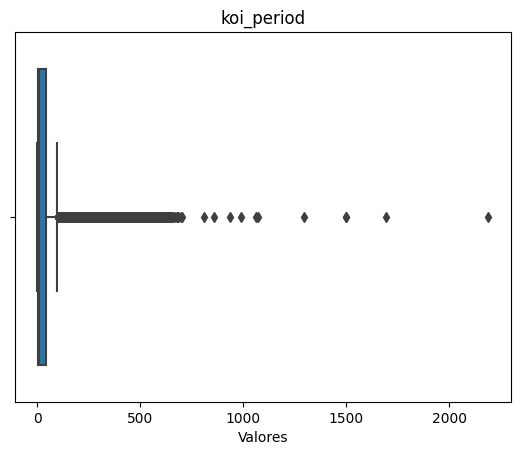

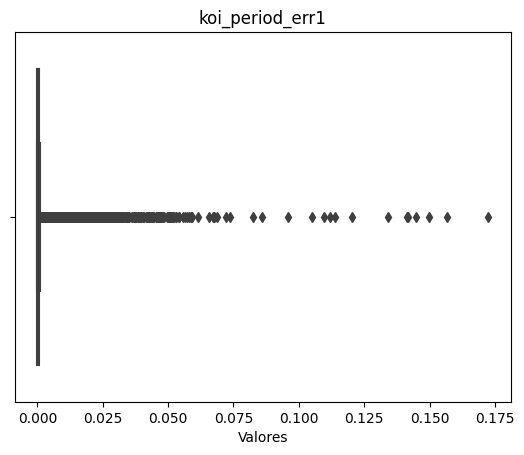

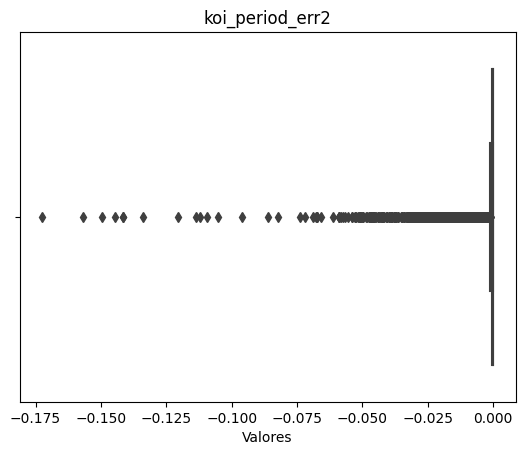

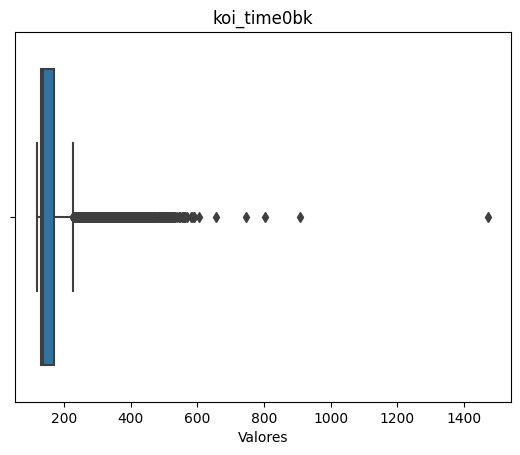

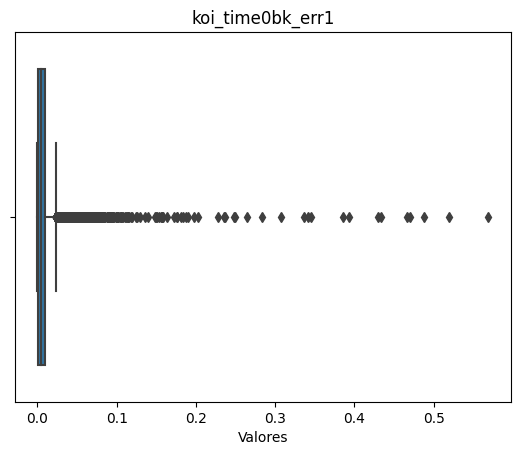

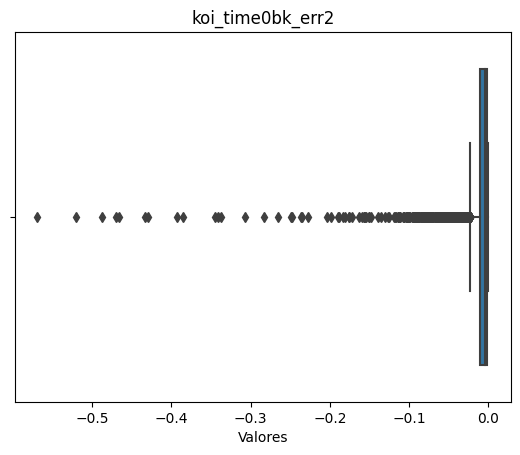

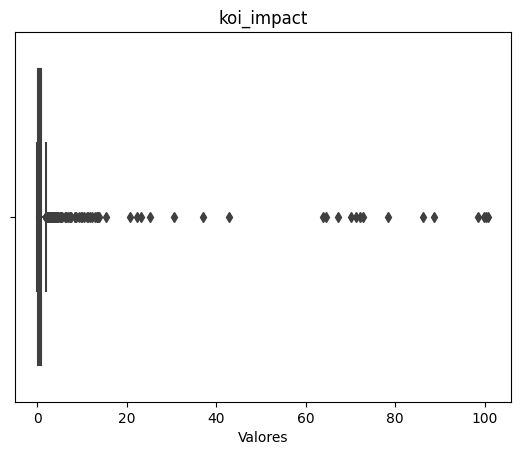

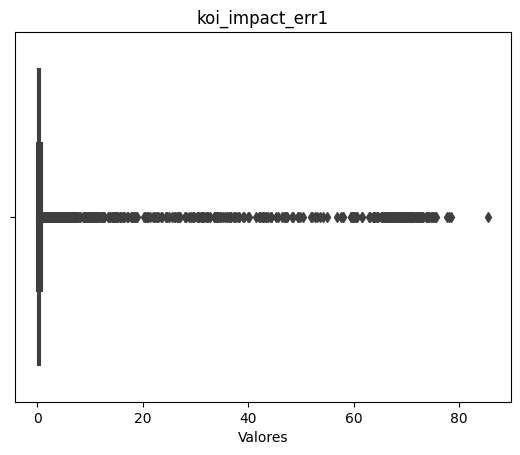

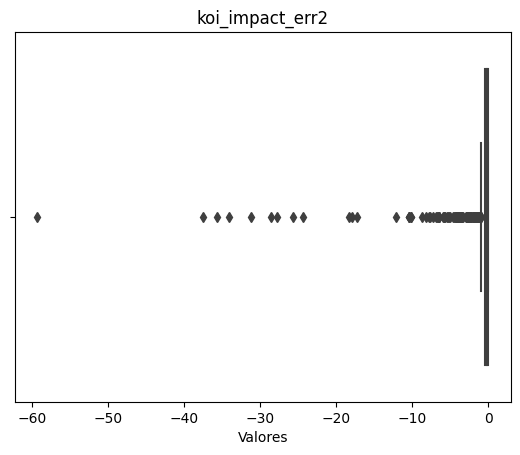

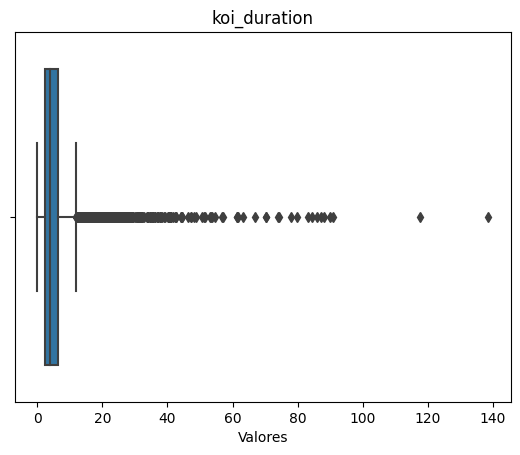

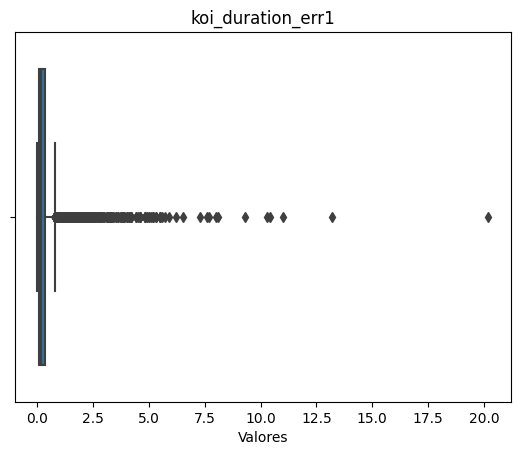

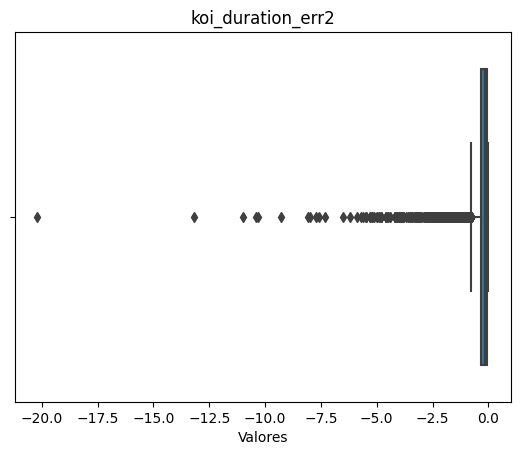

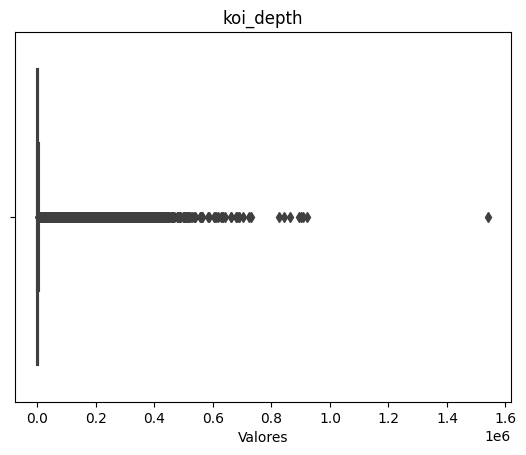

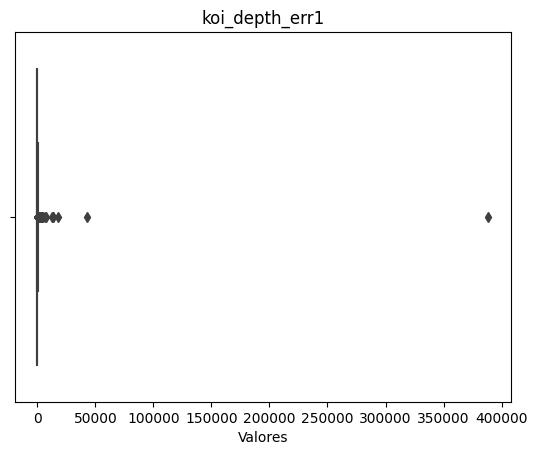

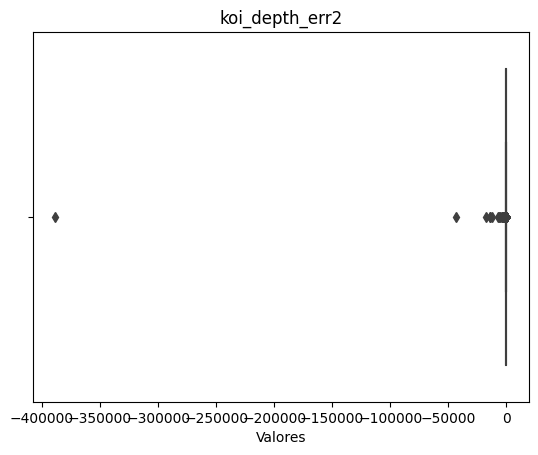

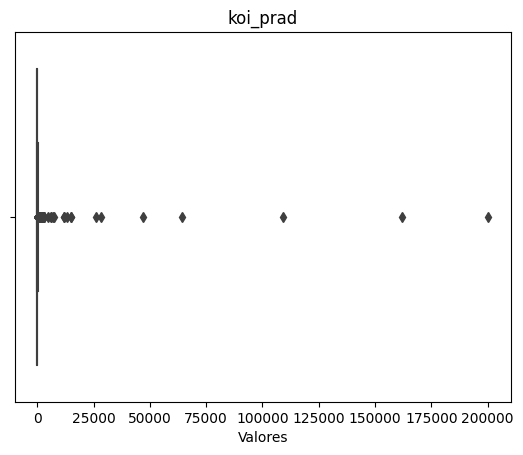

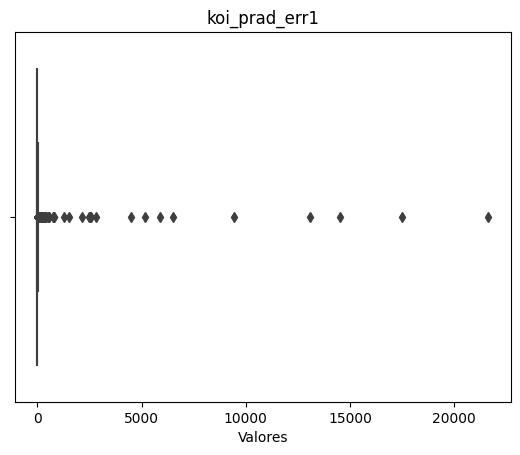

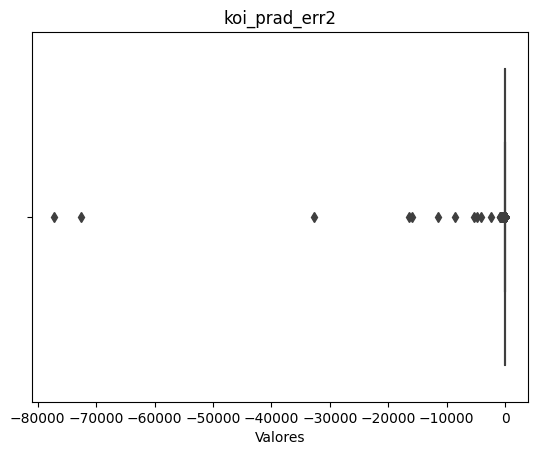

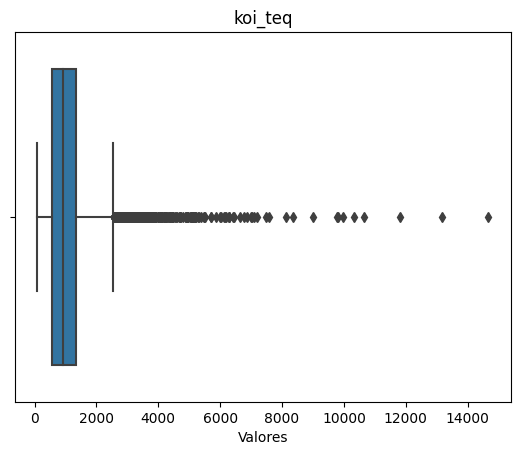

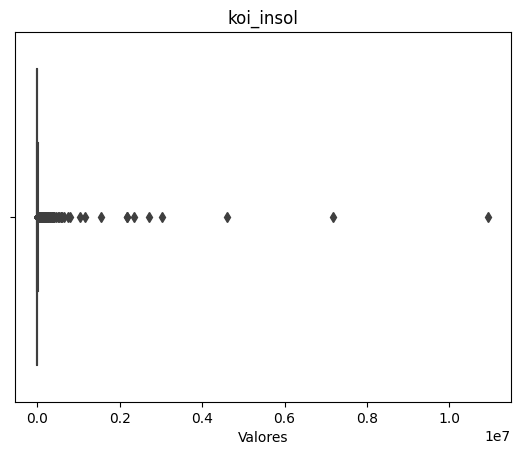

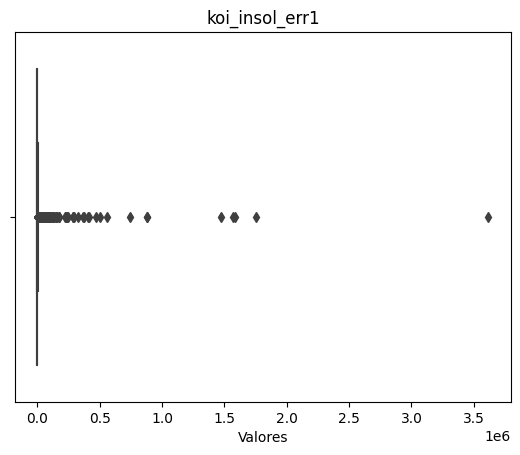

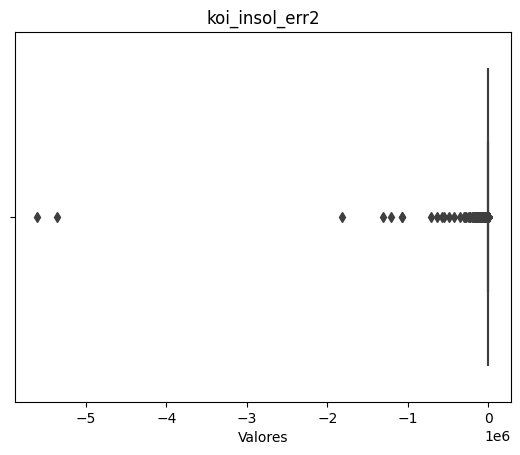

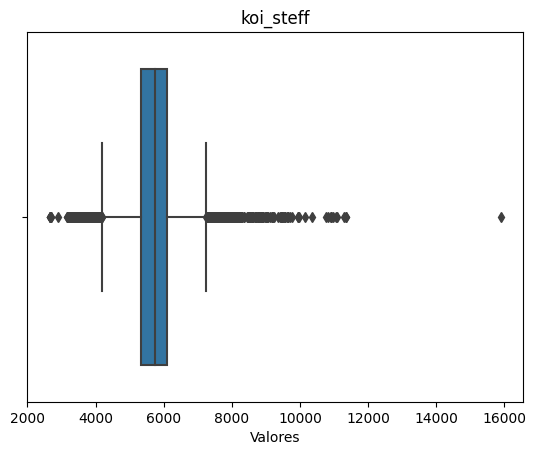

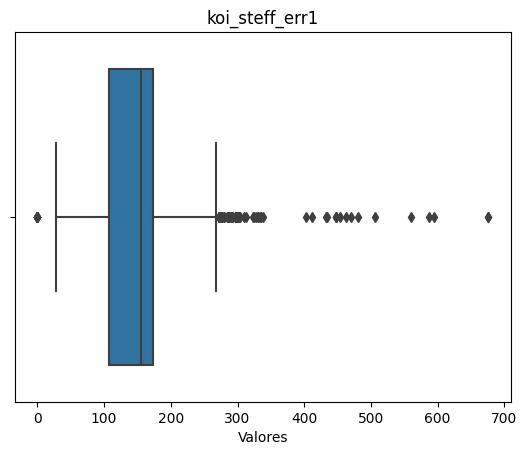

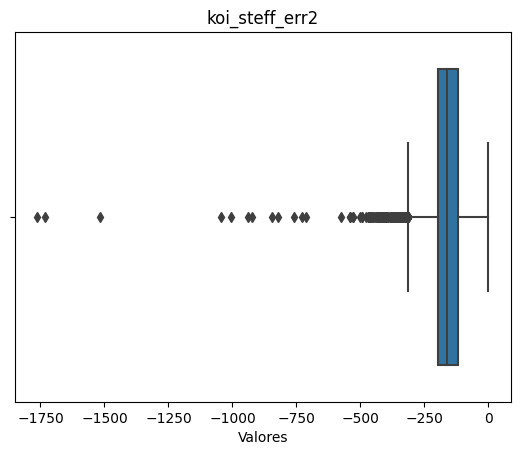

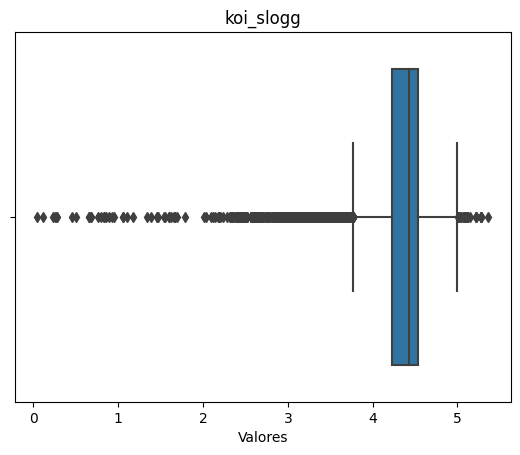

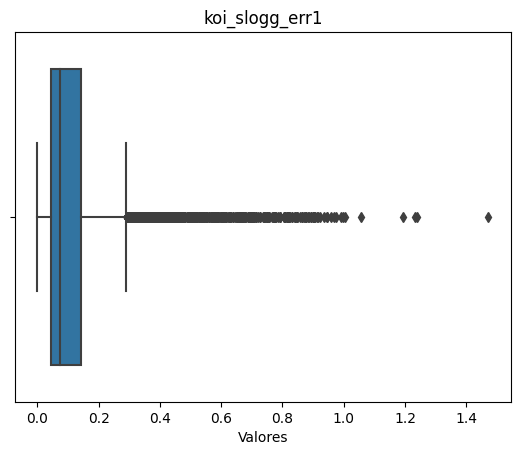

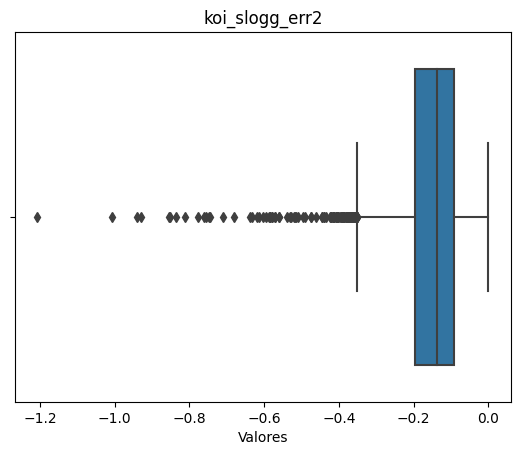

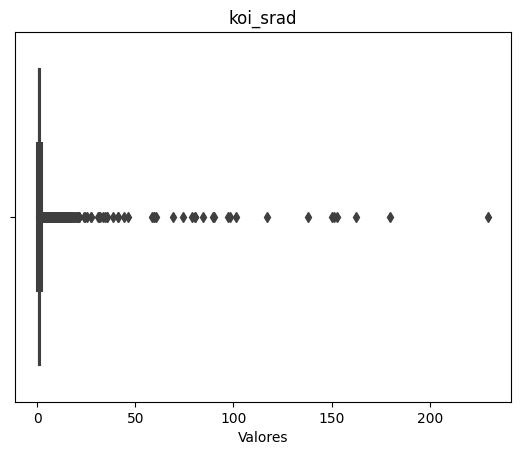

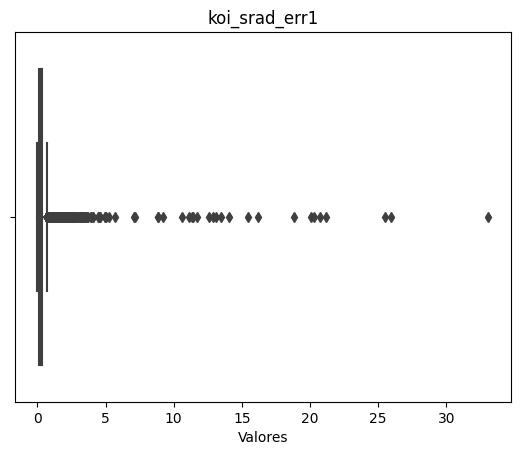

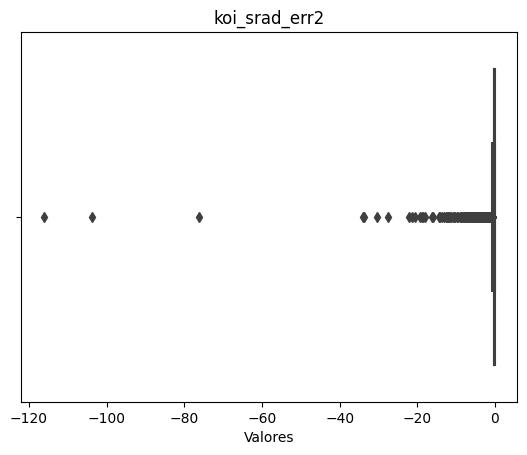

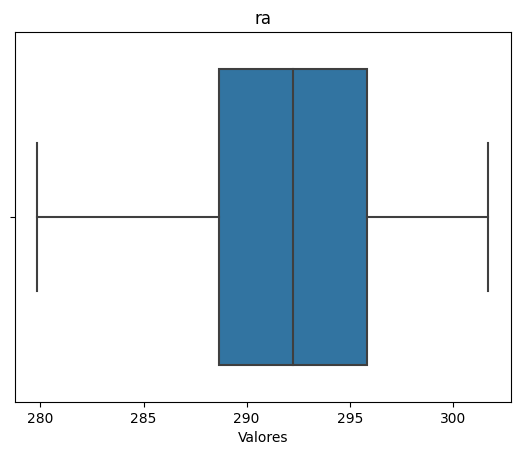

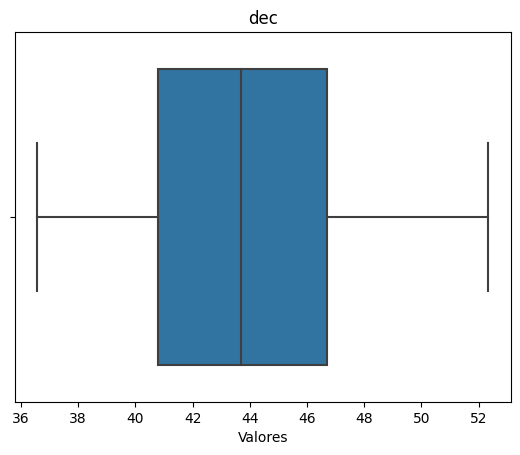

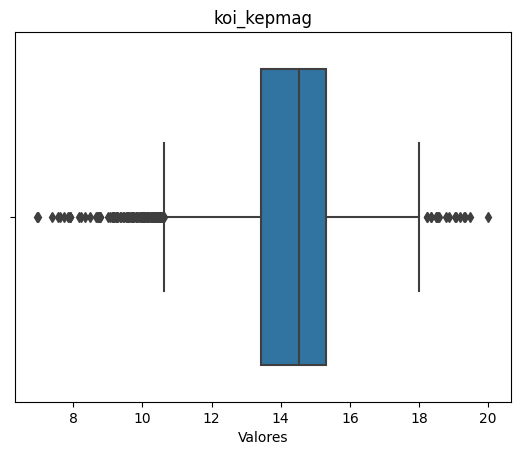

In [ ]:
for i in num.columns:
  sns.boxplot(data=num[i], x=num[i])
  plt.title(i)
  plt.xlabel('Valores')
  plt.show()

Eliminamos las filas con los valores anómalos.

In [ ]:
display(df2[df2['koi_depth'] > 1*1e6])
display(df2[df2['koi_insol'] > 7*1e6])

,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition
7675,374.318792,0.006991,-0.006991,431.5127,0.0296,-0.0296,0.8507,2.188,-0.8498,5.96,...,4.572,0.03,-0.03,0.815,0.349,-0.061,296.20227,39.40519,15.369,FALSE POSITIVE


,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition
6231,0.668827,0.000024,-0.000024,131.8692,0.02080,-0.02080,0.514,0.115,-0.514,1.069,...,0.652,0.195,-0.078,150.091,13.447,-76.199,299.32156,40.265339,11.598,CANDIDATE
9298,0.566794,0.000002,-0.000002,131.8368,0.00314,-0.00314,0.060,0.291,-0.060,4.714,...,0.269,0.255,-0.085,138.056,11.328,-33.983,291.18686,42.591022,11.476,FALSE POSITIVE


In [ ]:
a = df2[df2['koi_depth'] > 1*1e6]
b = df2[df2['koi_insol'] > 7*1e6]
df2 = df2.drop(a.index, axis=0)
df2 = df2.drop(b.index, axis=0)
num = df2.select_dtypes(include=[np.float64,np.int64])

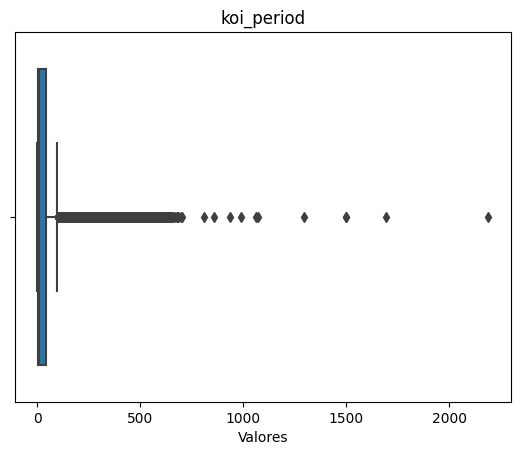

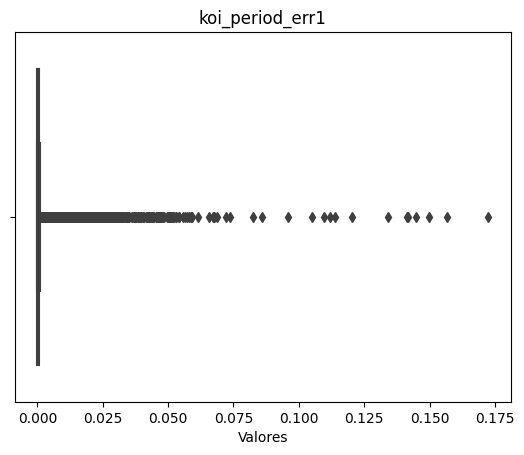

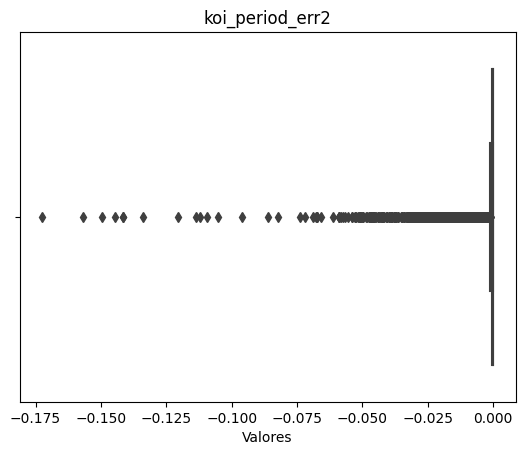

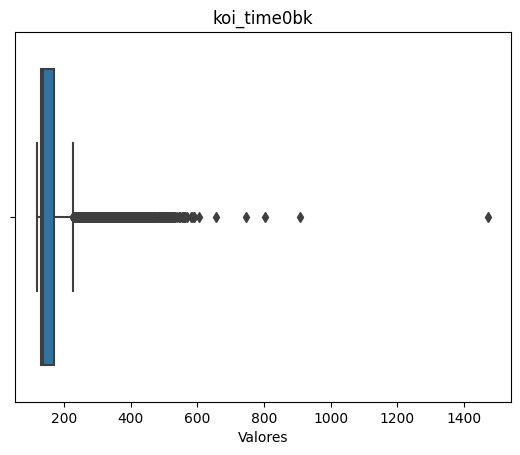

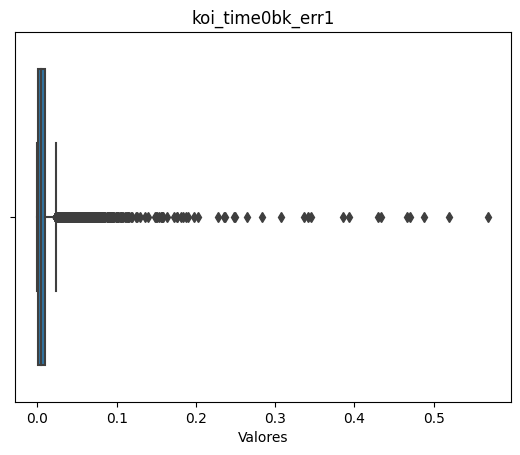

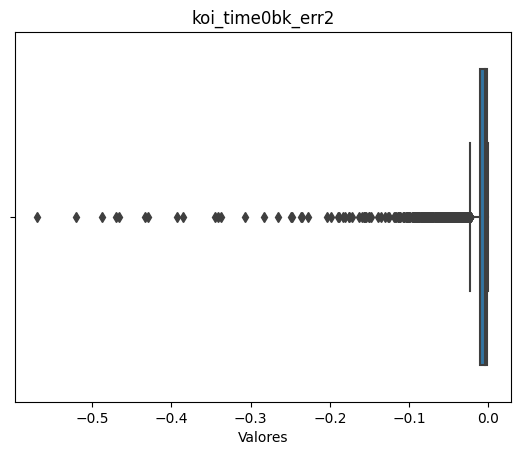

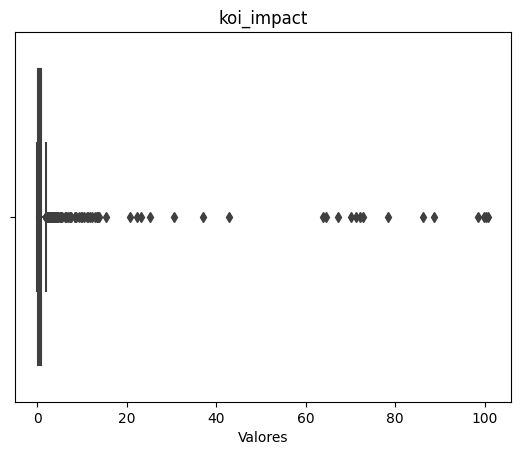

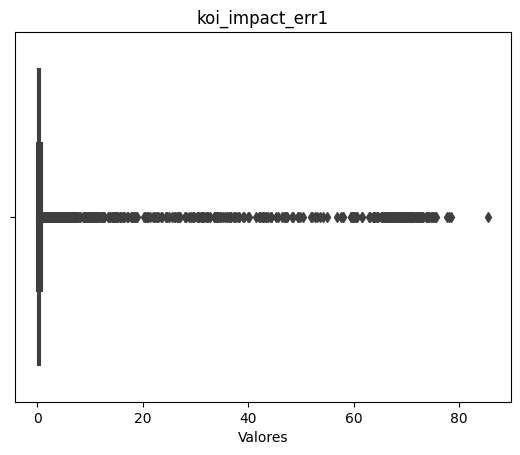

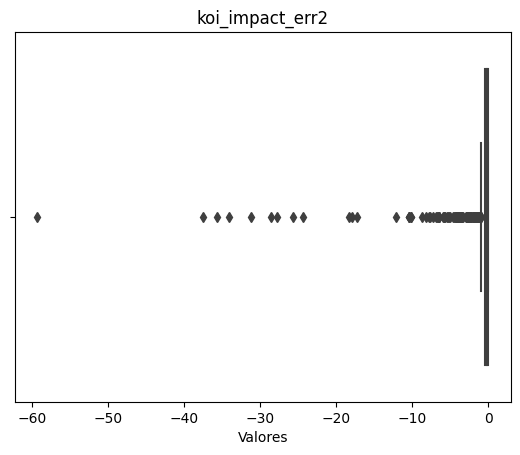

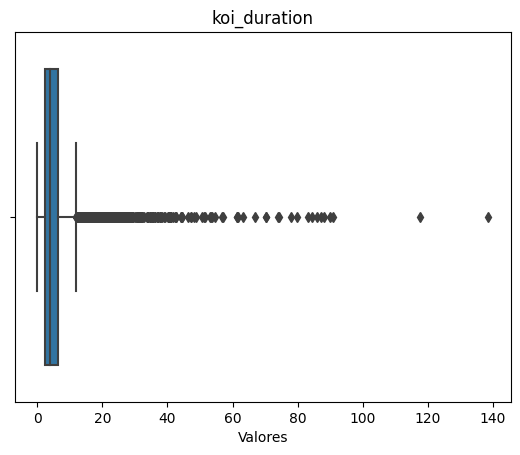

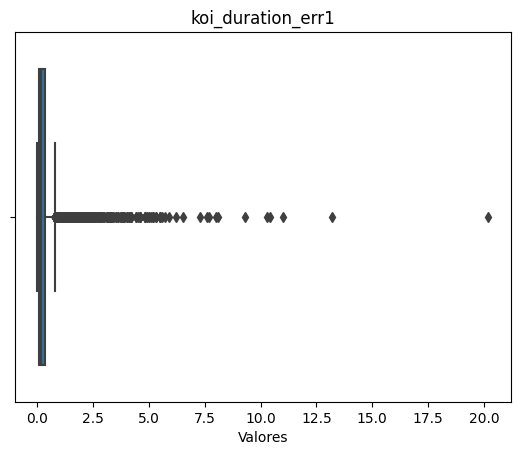

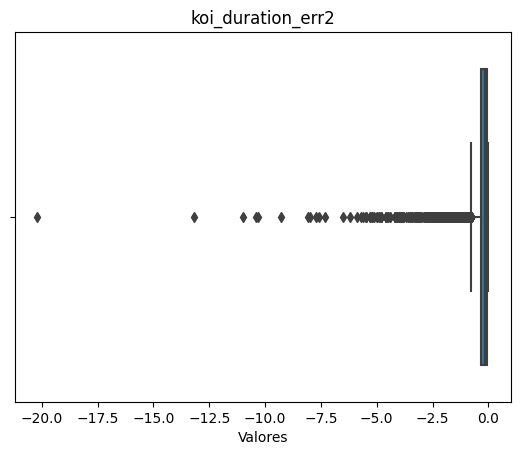

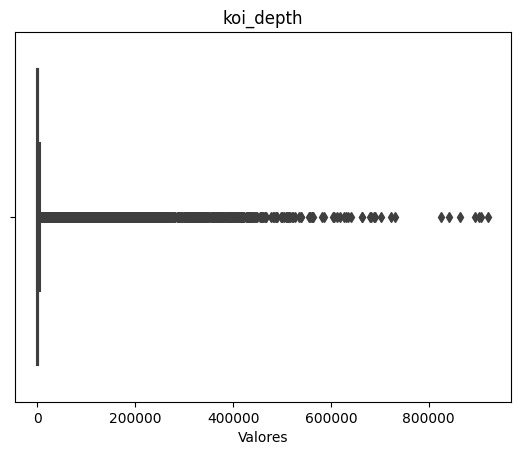

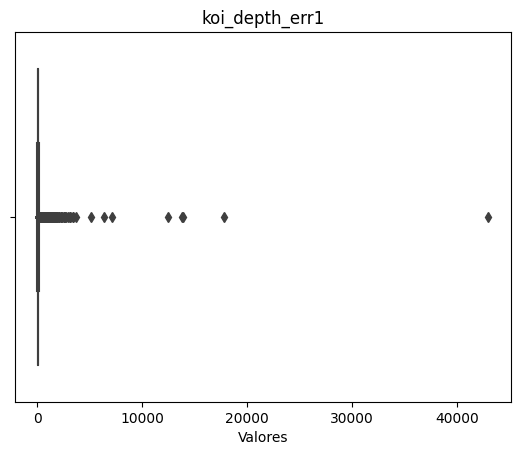

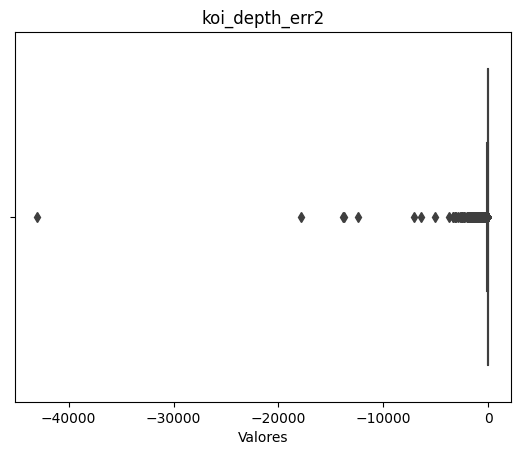

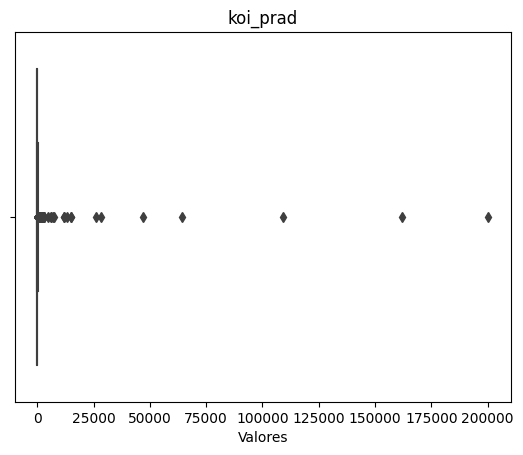

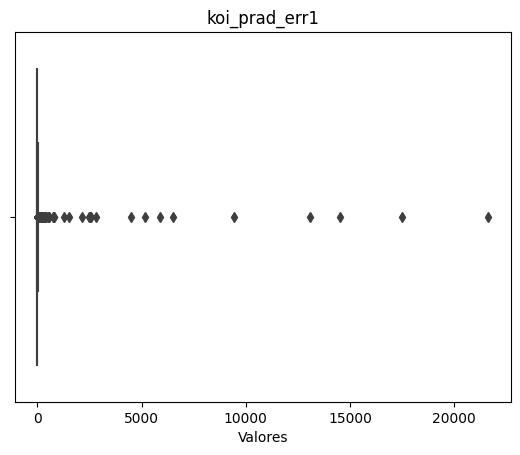

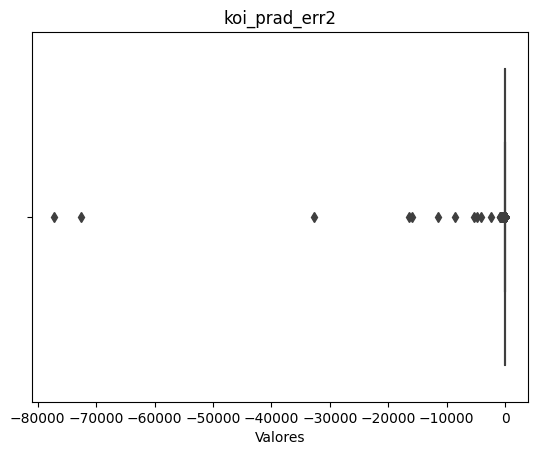

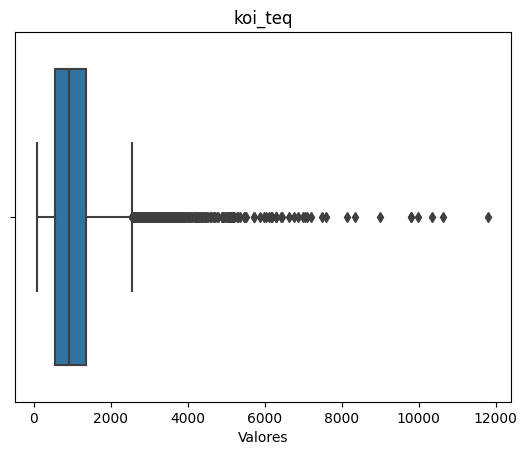

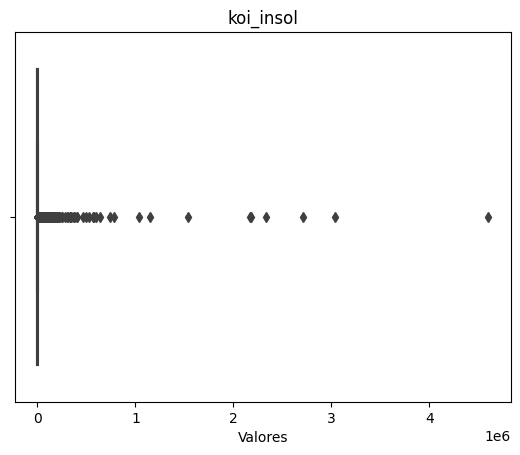

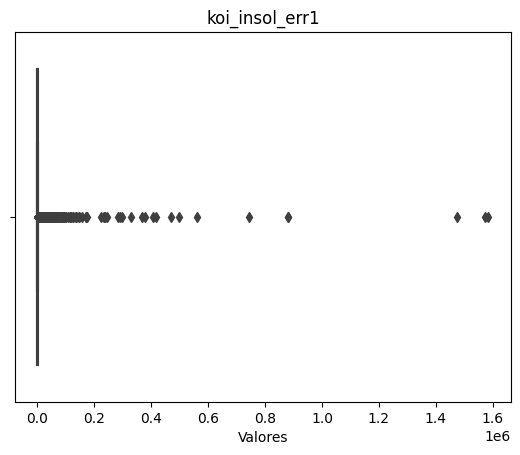

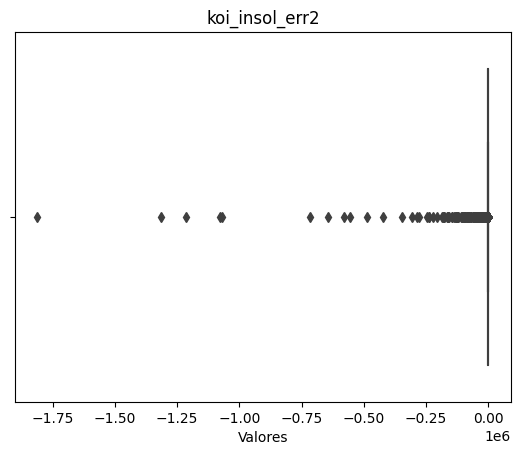

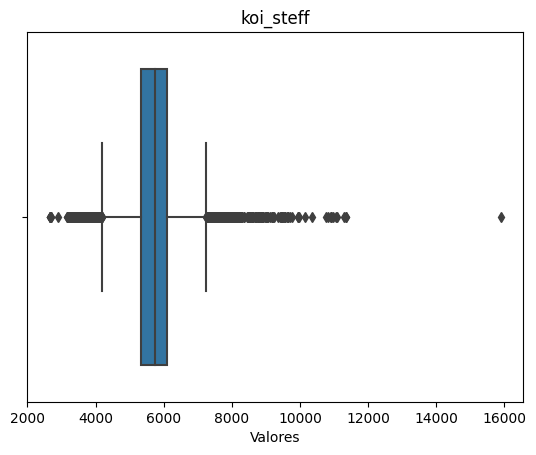

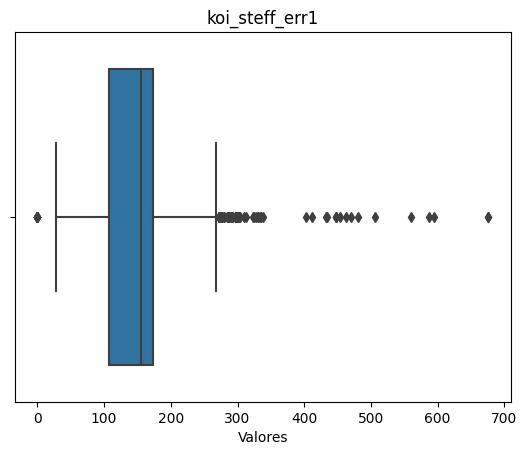

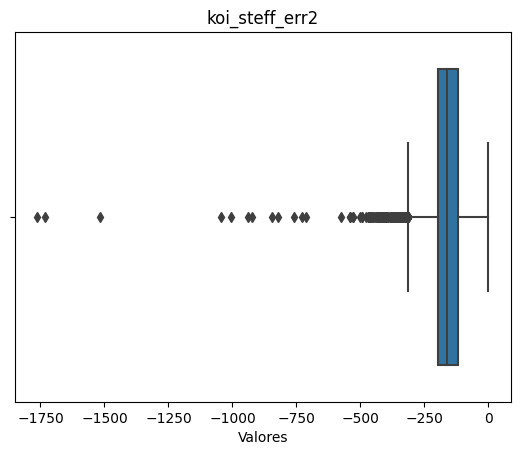

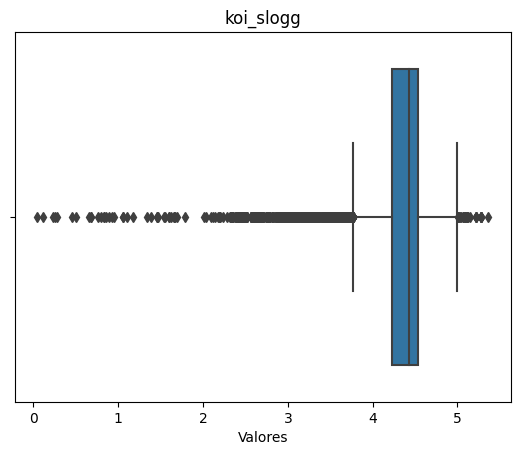

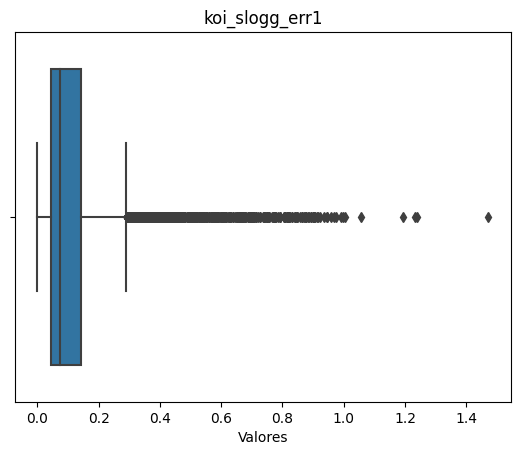

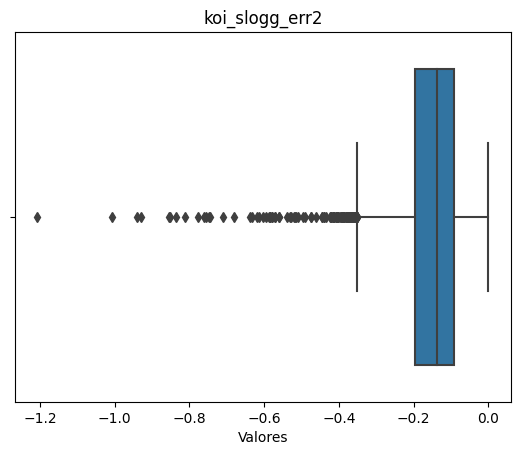

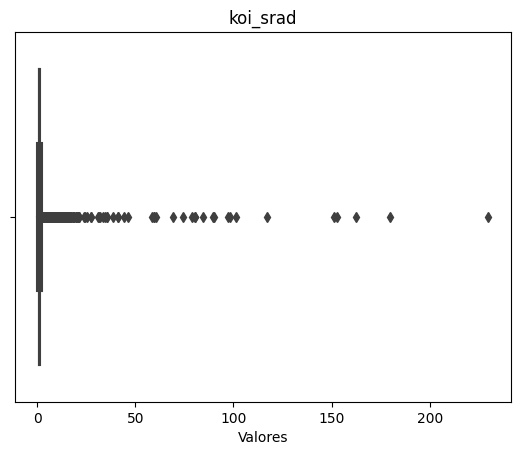

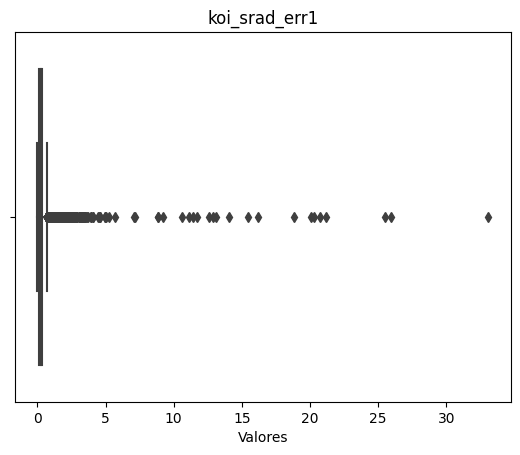

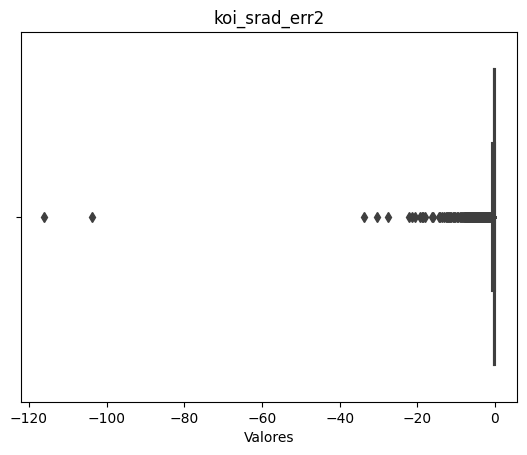

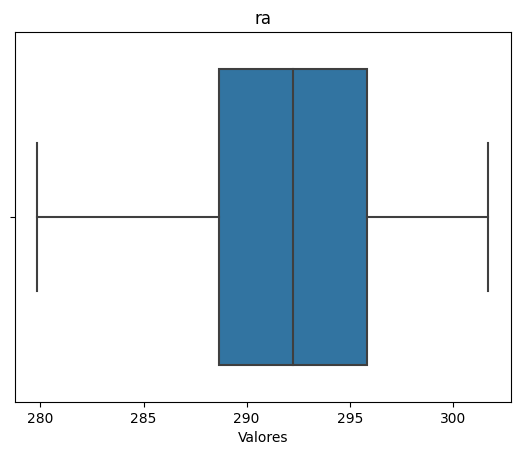

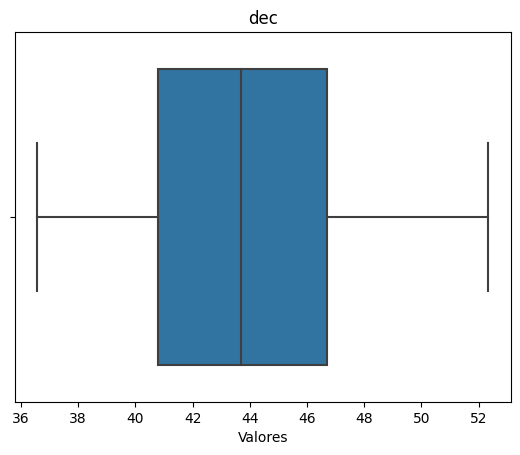

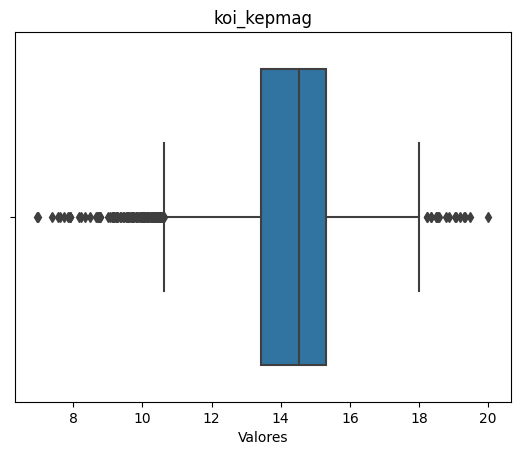

In [ ]:
for i in num.columns:
  sns.boxplot(data=num[i], x=num[i])
  plt.title(i)
  plt.xlabel('Valores')
  plt.show()

### **Análisis de correlación**

A continuación, realizamos un estudio de la correlación de las variables. Excluiremos las variables que representan incertidumbres, las acompañadas de '_err'.

In [ ]:
df2.shape

(9560, 35)

In [ ]:
errors=[]
for i in df2.columns:
    if '_err' in i:
        errors.append(i)

correlac = df2.drop(errors, axis=1)
correlac.shape

(9560, 15)

<ipython-input-27-48bc84d9a34a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(correlac.corr('pearson'), square=True,annot=True)


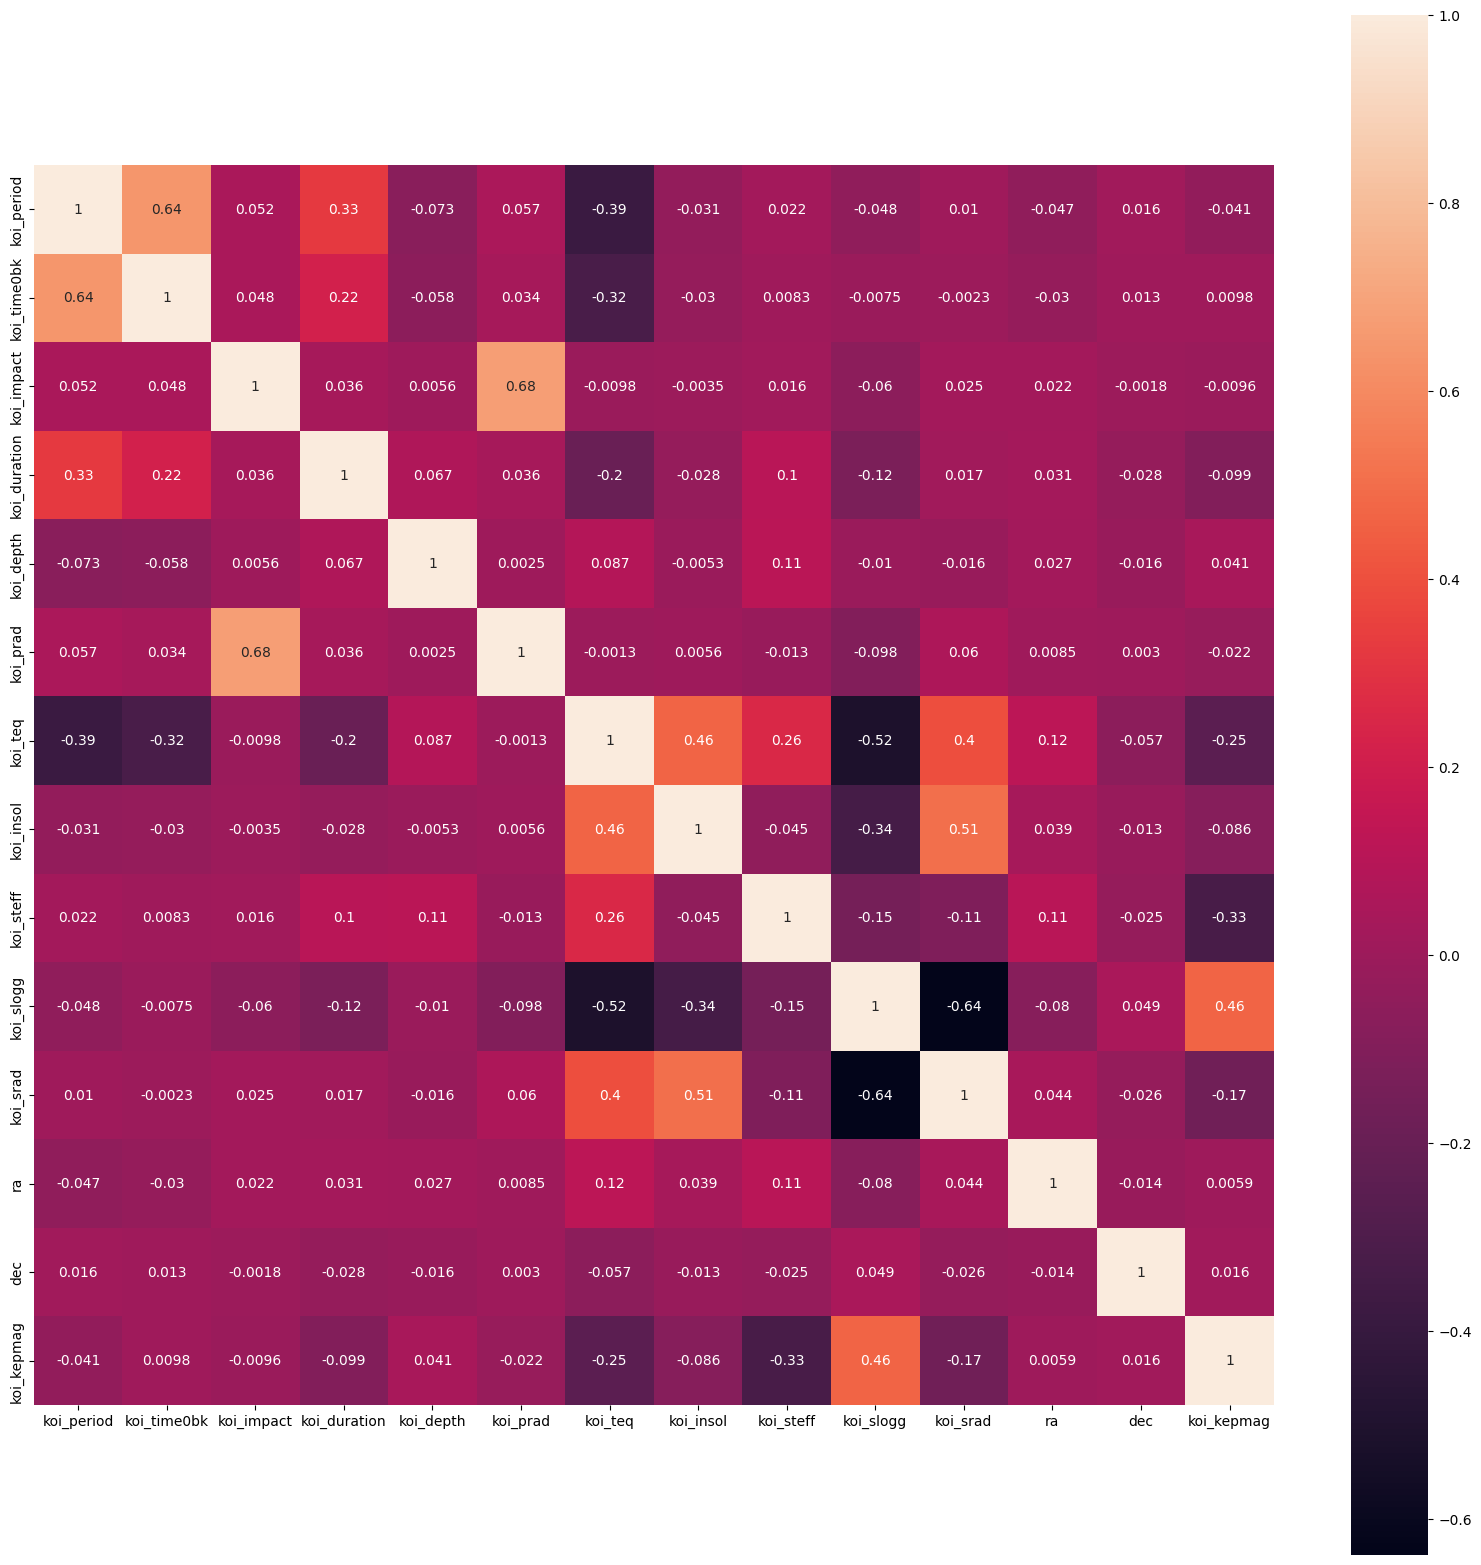

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(correlac.corr('pearson'), square=True,annot=True)
plt.show()

Las correlaciones no son exageradamente altas, por lo que en principio no sería necesario eliminar variables. Sin embargo, la variable 'koi_time0bk', que representa la fecha en la que se tomaron los datos, lógicamente no debería influir en determinar si uno de los candidatos es o no exoplaneta.

In [ ]:
df_final = df2.drop(['koi_time0bk'], axis=1)

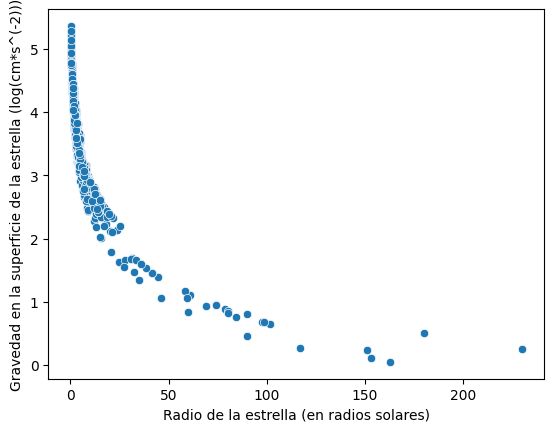

In [ ]:
sns.scatterplot(y=df2['koi_slogg'], x=df2['koi_srad'])
plt.ylabel("Gravedad en la superficie de la estrella (log(cm*s^(-2)))")
plt.xlabel("Radio de la estrella (en radios solares)")
plt.show()

### **Dataframe Final**

Nos quedamos entonces con el siguiente dataframe como nuestro conjunto definitivo de datos.

In [ ]:
df_final

,koi_period,koi_period_err1,koi_period_err2,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition
0,9.488036,2.775000e-05,-2.775000e-05,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,CONFIRMED
1,54.418383,2.479000e-04,-2.479000e-04,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,CONFIRMED
2,19.899140,1.494000e-05,-1.494000e-05,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,FALSE POSITIVE
3,1.736952,2.630000e-07,-2.630000e-07,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,FALSE POSITIVE
4,2.525592,3.761000e-06,-3.761000e-06,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,CONFIRMED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,8.589871,1.846000e-04,-1.846000e-04,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,...,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478,FALSE POSITIVE
9560,0.527699,1.160000e-07,-1.160000e-07,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,...,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082,FALSE POSITIVE
9561,1.739849,1.780000e-05,-1.780000e-05,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,...,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757,CANDIDATE
9562,0.681402,2.434000e-06,-2.434000e-06,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,...,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385,FALSE POSITIVE


## **Clasificación**

Continuamos con la tarea de clasificar los candidatos. El primer paso será importar aquellas librerías necesarias para crear y entrenar los modelos.

In [ ]:
#Para normalizar los datos, entrenarlos y validarlos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#Métodos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#Matriz de confusión e información sobre la clasificación
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

El objetivo de la clasificación es crear un modelo capaz de diferenciar aquellos individuos clasificados como CONFIRMED de los clasificados como FALSE POSITIVE, conociendo únicamente algunas características físicas, de su estrella, de la observación de su tránsito y de su posición.

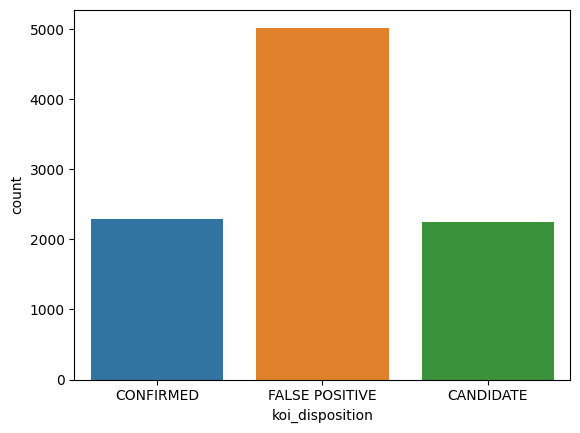

In [ ]:
sns.countplot(x='koi_disposition', data=df_final)
plt.show()

Eliminamos los individuos clasificados como CANDIDATES. Nos encontramos con un desbalanceo considerable entre las clases CONFIRMED y FALSE POSITIVE.

In [ ]:
candidates = df_final[df_final['koi_disposition'] == 'CANDIDATE']
df = df_final.drop(candidates.index, axis=0)
display(df)
print("\n\n\nNúmero de individuos por clase:\n",df['koi_disposition'].value_counts())

,koi_period,koi_period_err1,koi_period_err2,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition
0,9.488036,2.775000e-05,-2.775000e-05,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,CONFIRMED
1,54.418383,2.479000e-04,-2.479000e-04,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,...,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,CONFIRMED
2,19.899140,1.494000e-05,-1.494000e-05,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,...,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,FALSE POSITIVE
3,1.736952,2.630000e-07,-2.630000e-07,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,...,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,FALSE POSITIVE
4,2.525592,3.761000e-06,-3.761000e-06,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,...,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,CONFIRMED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9556,23.627035,2.264000e-04,-2.264000e-04,0.010900,-0.010900,1.096,38.210,-0.106,11.48100,0.16000,...,4.477,0.099,-0.121,0.857,0.138,-0.101,299.21881,44.181862,16.375,FALSE POSITIVE
9559,8.589871,1.846000e-04,-1.846000e-04,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,...,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478,FALSE POSITIVE
9560,0.527699,1.160000e-07,-1.160000e-07,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,...,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082,FALSE POSITIVE
9562,0.681402,2.434000e-06,-2.434000e-06,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,...,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385,FALSE POSITIVE





Número de individuos por clase:
 FALSE POSITIVE    5021
CONFIRMED         2293
Name: koi_disposition, dtype: int64


### **Creación del grupo de entrenamiento y validación**

Separamos la variable objetivo koi_disposition de las variables predictoras.

In [ ]:
X = df.drop(['koi_disposition'],axis=1)    #Variables predictoras
Y = df['koi_disposition']     #Variable a predecir

Creamos el conjunto de entrenamiento y de validación.

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.75,shuffle=True,random_state=1)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(5485, 33)
(5485,)
(1829, 33)


#### **Oversampling**

A continuación, balanceamos las clases con el método de oversampling. Primero, juntamos el conjunto de datos de entrenamiento (las variables predictoras con la objetivo). Seguidamente, dividimos en dos subconjuntos: los individuos de clase CONFIRMED y los de clase FALSE POSITIVE.

In [ ]:
X_train.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
entreno = pd.concat([X_train,Y_train], axis=1)

confirmed = entreno[entreno['koi_disposition'] =='CONFIRMED']
false_positive = entreno[entreno['koi_disposition'] =='FALSE POSITIVE']

comfi = confirmed.shape[0]
falso = false_positive.shape[0]

print(confirmed.shape)
print("Falsos positivos:",falso)
print("Confirmados:",comfi)

(1726, 34)
Falsos positivos: 3759
Confirmados: 1726


Como hay menos individuos de la clase CONFIRMED, creamos un nuevo conjunto de datos de esta clase con tantos individuos como tiene la clase FALSE POSITIVE. Esto se logra volviendo a añadir al conjunto de CONFIRMED individuos que ya existen.

In [ ]:
over = confirmed.sample(n=falso, replace = True, random_state=1)

x_over = over.drop(['koi_disposition'],axis=1)
y_over = over['koi_disposition']

print(x_over.shape)
print(y_over.shape)

(3759, 33)
(3759,)


Finalmente, unimos el conjunto sobremuestreado de CONFIRMED con el de FALSE POSITIVE en un mismo dataframe, del que obtendremos las variables predictoras y la variable a predecir. Este será nuestro conjunto de entrenamiento definitivo.

In [ ]:
over.reset_index(drop=True, inplace=True)
false_positive.reset_index(drop=True, inplace=True)
train = pd.concat([over,false_positive], axis=0)

print(train[train['koi_disposition'] =='CONFIRMED'].shape)
print(train[train['koi_disposition'] =='FALSE POSITIVE'].shape)


x_train = train.drop(['koi_disposition'],axis=1)
y_train = train['koi_disposition']

print(x_train.shape)
print(y_train.shape)

(3759, 34)
(3759, 34)
(7518, 33)
(7518,)


#### **Normalización**

Lo normalizamos.

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.transform(X_test)

### **Creación del modelo y matriz de confusión**

Emplearemos 4 modelos diferentes de clasificación, para poder comparar cuál de ellos consigue mejores resultados.

In [ ]:
models = {
    " Logistic Regression": LogisticRegression(max_iter=1000),
    "    Decision Tree": DecisionTreeClassifier(),
    "   Random Forest": RandomForestClassifier(),
    "     Naive Bayes": GaussianNB(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

 Logistic Regression trained.
    Decision Tree trained.
   Random Forest trained.
     Naive Bayes trained.


El siguiente código muestra la matriz de confusión y las diferentes tasas de acierto de cada modelo. **Los resultados variarán cada vez que se reentrene el modelo.** La forma de evitar esto es creando una semilla o 'seed', de manera que garanticemos la replicabilidad de los datos.

In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(name+"\n---------------------\n",confusion_matrix(Y_test,y_pred),"\n")
    print(name,"Accuracy: {:.3f}%".format(accuracy_score(Y_test,y_pred)*100),"\n")
    print(classification_report(Y_test,y_pred),"\n\n")


 Logistic Regression
---------------------
 [[ 535   32]
 [ 148 1114]] 

 Logistic Regression Accuracy: 90.159% 

                precision    recall  f1-score   support

     CONFIRMED       0.78      0.94      0.86       567
FALSE POSITIVE       0.97      0.88      0.93      1262

      accuracy                           0.90      1829
     macro avg       0.88      0.91      0.89      1829
  weighted avg       0.91      0.90      0.90      1829
 


    Decision Tree
---------------------
 [[ 483   84]
 [  91 1171]] 

    Decision Tree Accuracy: 90.432% 

                precision    recall  f1-score   support

     CONFIRMED       0.84      0.85      0.85       567
FALSE POSITIVE       0.93      0.93      0.93      1262

      accuracy                           0.90      1829
     macro avg       0.89      0.89      0.89      1829
  weighted avg       0.90      0.90      0.90      1829
 


   Random Forest
---------------------
 [[ 507   60]
 [  60 1202]] 

   Random Forest Accuracy

### **Testeo con los candidatos**

Tras entrenar varios modelos, concluimos que el Random Forest es el que mejores resultados da. Podemos ponerlo a prueba intentando predecir qué individuos de la clase CANDIDATE eliminada al principio de la sección son exoplanetas.

In [ ]:
modelos = list(models.keys())
randforest = modelos[2]

x_candidate = candidates.drop(['koi_disposition'],axis=1)
print("Hay un total de",x_candidate.shape[0],"candidatos a exoplaneta.\n")

X_candidate_test=scaler.transform(x_candidate)
y_pred = models[randforest].predict(X_candidate_test)

exo_candidates = 0
for elemento in y_pred:
    if elemento == 'CONFIRMED':
        exo_candidates += 1


exo_real = df[df['koi_disposition'] == "CONFIRMED"]

print("Con el modelo Random Forest:")
print("- Se han confirmado como exoplanetas a", exo_candidates,"candidatos.")
print("- Se han confirmado como falsos positivos a", x_candidate.shape[0]-exo_candidates,"candidatos.")
print("\nEl porcentaje de exoplanetas confirmados predichos es del {:.3f}%".format(exo_candidates/x_candidate.shape[0]))
print("El porcentaje de exoplanetas confirmados en el conjunto original es del {:.3f}%".format(exo_real.shape[0]/X.shape[0]))

Hay un total de 2246 candidatos a exoplaneta.

Con el modelo Random Forest:
- Se han confirmado como exoplanetas a 813 candidatos.
- Se han confirmado como falsos positivos a 1433 candidatos.

El porcentaje de exoplanetas confirmados predichos es del 0.362%
El porcentaje de exoplanetas confirmados en el conjunto original es del 0.314%


## **Agrupamiento**

Para terminar, realizaremos un agrupamiento de los datos utilizando técnicas de clustering. Como en los casos anteriores, el primer paso es importar las librerías necesarias.

In [ ]:
#Importamos las librerías que vamos a utilizar

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

Trabajaremos con las variables que representan parámetros estelares y la variable koi_kepmag, que indica la magnitud del objeto observada por Kepler.

In [ ]:
parametros_star = ['koi_srad','koi_steff','koi_slogg']
stellar = df_final[parametros_star].copy()

Definimos la función que utilizaremos para dibujar las gráficas con los agrupamientos

In [ ]:
def cluster_plot(modelo,dataframe,x,y):
  dataframe['Cluster'] = modelo.labels_    #Añado al dataframe una nueva columna con el cluster al que pertenece cada individuo
  plt.figure(figsize=(6,5))
  plt.scatter(dataframe[x], dataframe[y], c=dataframe['Cluster'], cmap='plasma',marker = '.', s=100, alpha = 0.6)
  plt.xlabel(x)
  plt.ylabel(y)

### **Algoritmo K-means**

Con el método del codo elegimos el número óptimo de clusters para nuestro modelo, 4 o 5 en este caso. Por escoger uno de los dos, nos quedamos con el 4.

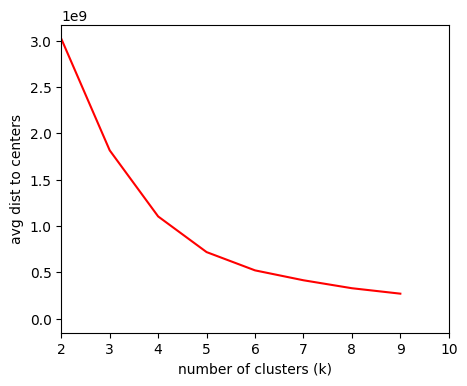

In [ ]:
max_n_clusters = 10
iterations = 5000

squared_distance = np.zeros(max_n_clusters)
for k in range(2,max_n_clusters):
    kmeans = KMeans(n_clusters = k, n_init = 10, max_iter = iterations).fit(stellar)
    squared_distance[k] = kmeans.inertia_

plt.figure(figsize=(5,4))
plt.plot(squared_distance,c='r')
plt.xlim((2,max_n_clusters))
plt.xlabel('number of clusters (k)')
plt.ylabel('avg dist to centers')
plt.show()

Graficamos distintas variables para encontrar patrones o clústers claros. **Cada vez que se vuelve a correr esta celda, cambia el orden de los clústers**, es decir, la agrupación que ahora aparece como 1, luego puede aparecer como 3. Sin embargo, el contenido de los clústers no cambia.

Número de individuos por clúster:

1    4559
3    3806
2     975
0     220
Name: Cluster, dtype: int64 



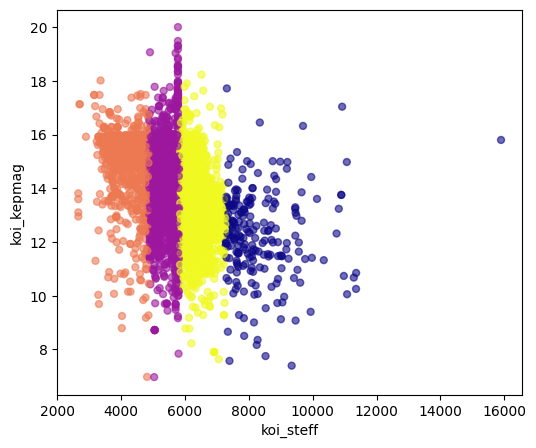

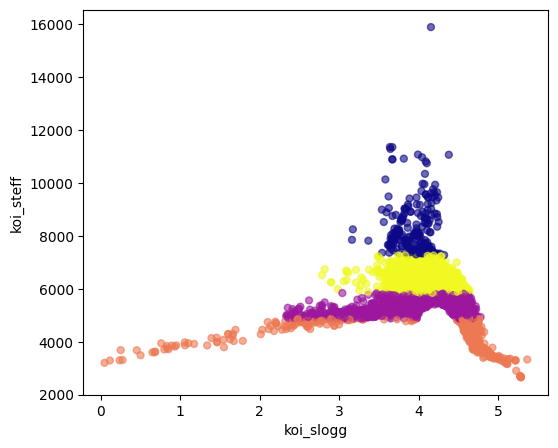

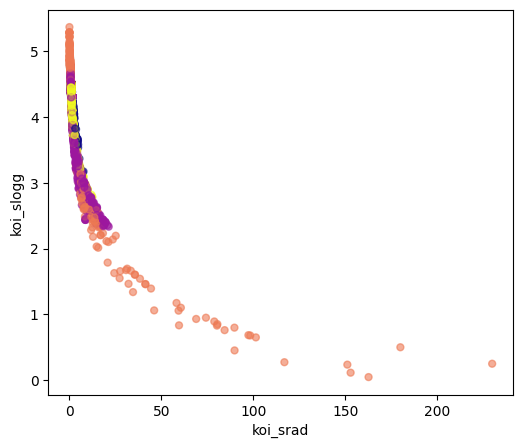

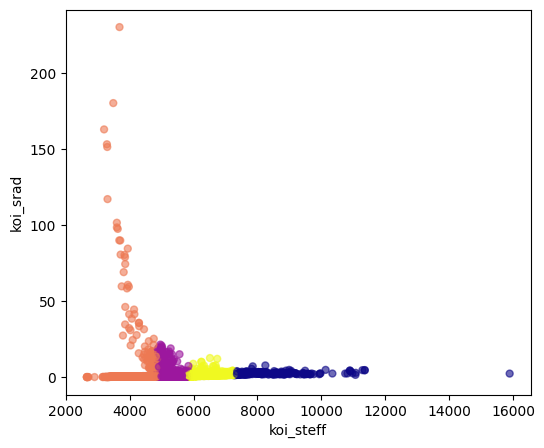

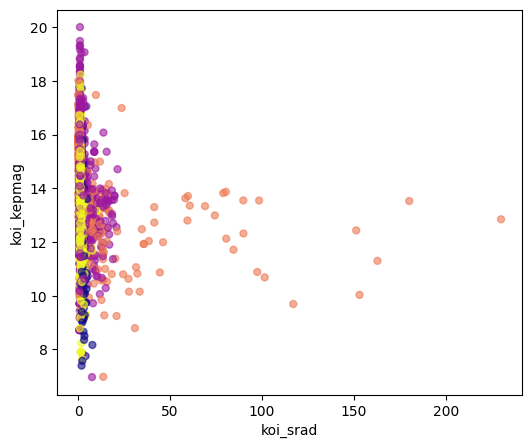

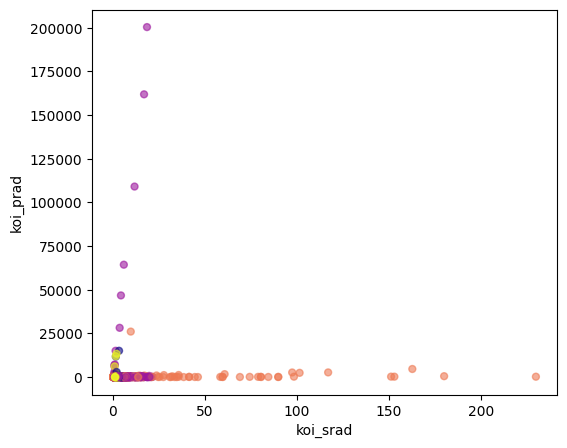

In [ ]:
#cluster_plot(modelo,dataframe,x,y)

km_star = KMeans(n_clusters = 4, n_init = 10, max_iter = iterations).fit(stellar)

cluster_plot(km_star, df_final, 'koi_steff', 'koi_kepmag')
cluster_plot(km_star, df_final, 'koi_slogg', 'koi_steff')
cluster_plot(km_star, df_final, 'koi_srad', 'koi_slogg')
cluster_plot(km_star, df_final, 'koi_steff', 'koi_srad')
cluster_plot(km_star, df_final, 'koi_srad', 'koi_kepmag')
cluster_plot(km_star, df_final, 'koi_srad', 'koi_prad')


print("Número de individuos por clúster:\n")
print(df_final['Cluster'].value_counts(),"\n")

La ascención recta (ra) y la declinación (dec) son las coordenadas utilizadas en astrofísica y astronomía para ubicar objetos en el cielo. Se puede apreciar en el siguiente gráfico que existen estrellas de cada tipo en toda la región del espacio exterior donde el telescopio Kepler realizó su observación.

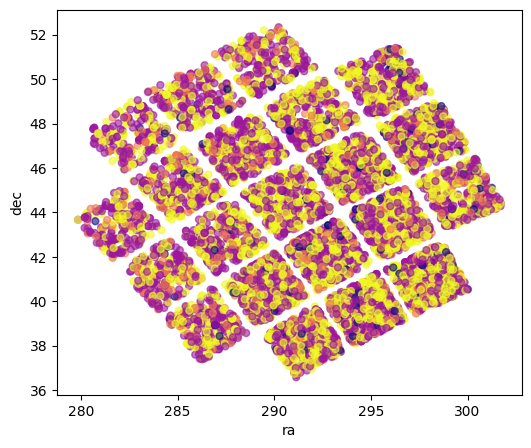

In [ ]:
cluster_plot(km_star, df_final, 'ra', 'dec')

Número de exoplanetas confirmados, candidatos y falsos positivos en función del cluster al que están asociados.

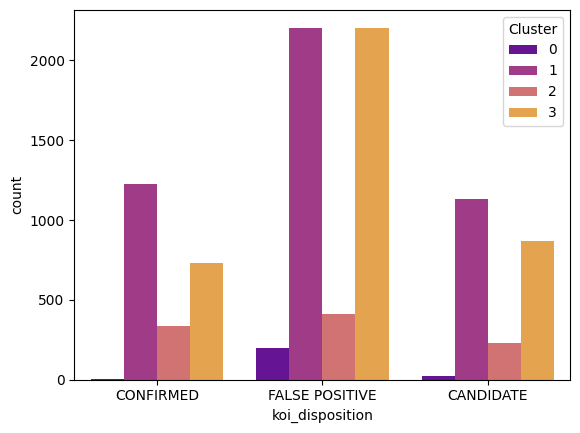

In [ ]:
sns.countplot(x='koi_disposition', hue='Cluster', data=df_final, palette='plasma')
plt.show()

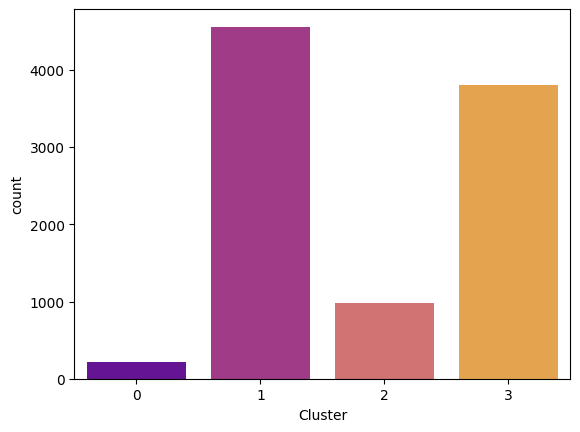

In [ ]:
sns.countplot(x='Cluster',data=df_final,palette='plasma')
plt.show()

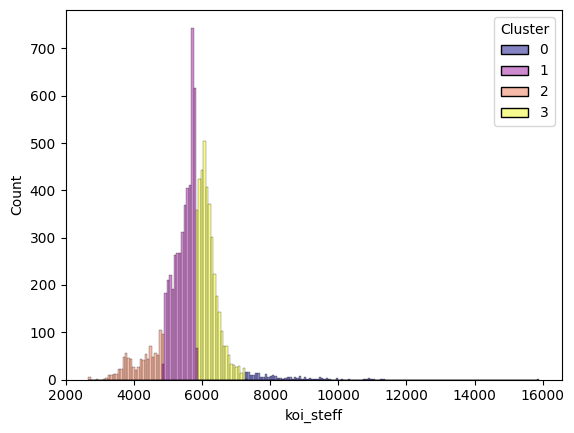

In [ ]:
sns.histplot(x='koi_steff', hue='Cluster', data=df_final, palette='plasma')
plt.show()

### **Tipo Espectral**

Como el patrón que ha seguido el agrupamiento está relacionado con la temperatura efectiva (la última gráfica es el más claro ejemplo de ello), vamos a comprobar que información podemos obtener de ella. Creamos una nueva variable que refleje el tipo espectral de la estrella, que viene definido por intervalos de temperatura efectiva.

In [ ]:
tipo_s = ['O','B','A','F','G','K','M']

def stellar_type(teff):
    if teff > 30000:
        return tipo_s[0]
    elif teff > 10000:
        return tipo_s[1]
    elif teff > 7500:
        return tipo_s[2]
    elif teff > 6000:
        return tipo_s[3]
    elif teff > 5000:
        return tipo_s[4]
    elif teff > 3500:
        return tipo_s[5]
    else:
        return tipo_s[6]


spectral_class = []

for i in df_final['koi_steff'].values:
    spectral_class.append(stellar_type(i))

In [ ]:
df_final['Tipo_S'] = spectral_class
df_final['Tipo_S'].value_counts()

G    5194
F    2892
K    1243
A     164
M      53
B      14
Name: Tipo_S, dtype: int64

Encontramos que los clústers están bien relacionados con el tipo espectral de las estrellas que orbitan los candidatos.

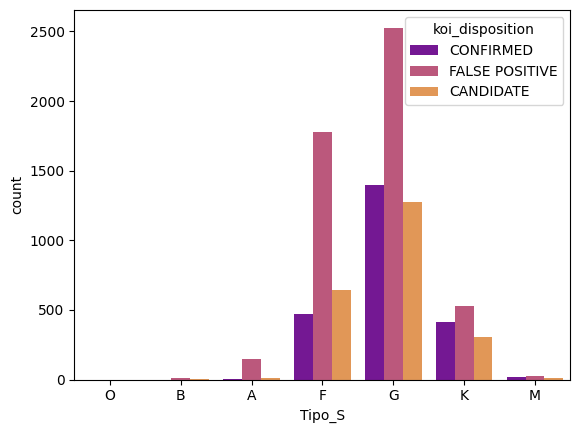

In [ ]:
sns.countplot(x='Tipo_S', hue='koi_disposition', data=df_final, order=['O','B','A','F','G','K','M'], palette='plasma')
plt.show()

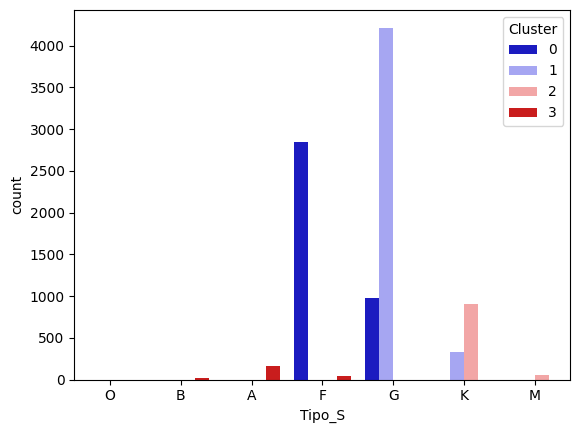

In [ ]:
sns.countplot(x='Tipo_S', hue='Cluster', data=df_final,order=['O','B','A','F','G','K','M'], palette='seismic')
plt.show()

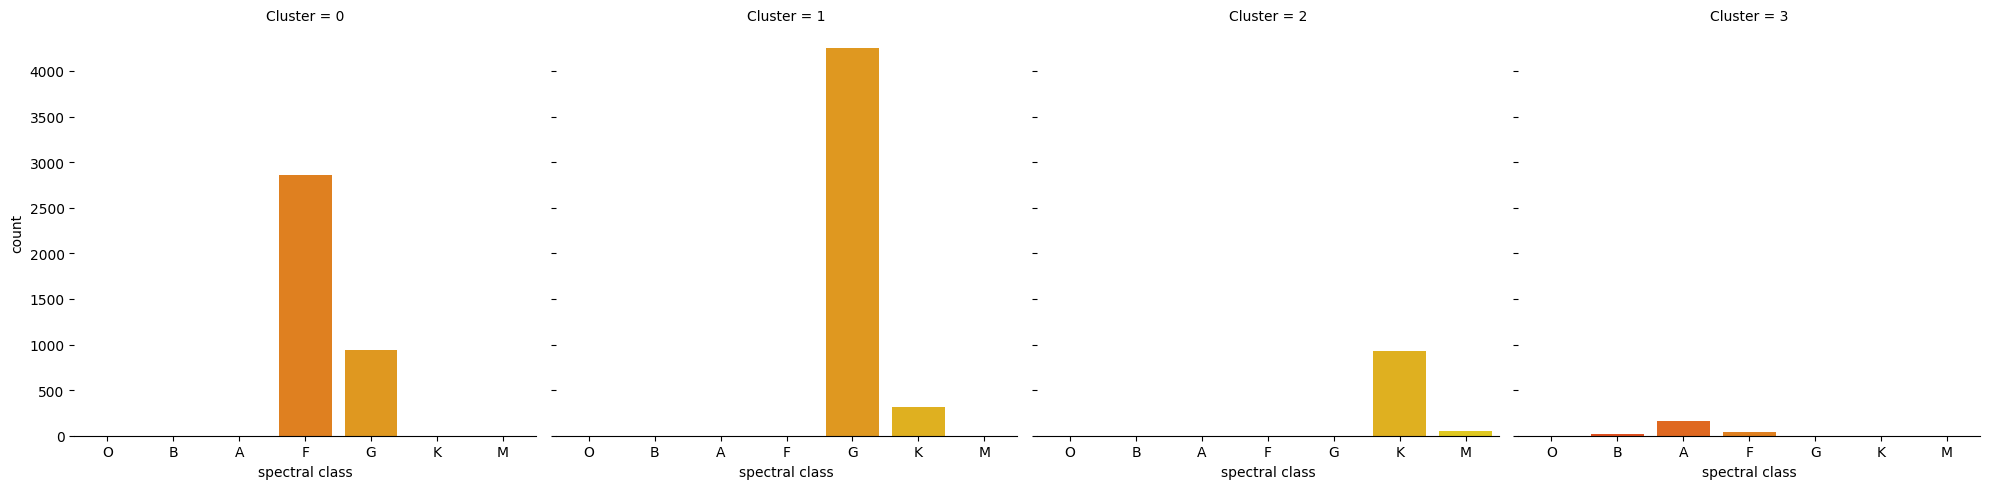

In [ ]:
ax = sns.catplot(x='Tipo_S', col='Cluster', data=df_final, kind="count", order=['O','B','A','F','G','K','M'],palette='autumn')
ax.set(xlabel='spectral class')
ax.despine(left=True, bottom=False)
plt.show()

### **Agrupamiento por densidad DBSCAN**

  El clustering por densidad encuentra grupos en función de la cantidad de individuos que un punto tenga en un área alrededor suya. Estos parámetros pueden ajustarse a voluntad.

Número de individuos por clúster:

 0    5421
-1    3884
 1     255
Name: Cluster, dtype: int64 



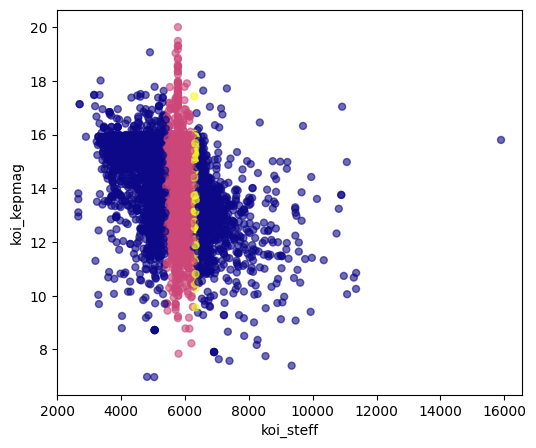

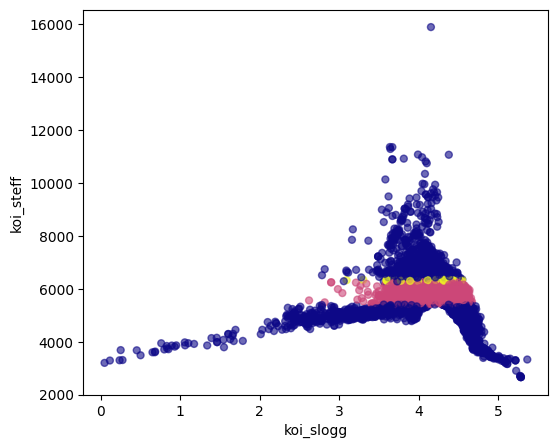

In [ ]:
#cluster_plot(modelo,dataframe,x,y)

dbscan_star = DBSCAN(eps= 28 , min_samples= 250).fit(stellar)

cluster_plot(dbscan_star, df_final,'koi_steff','koi_kepmag')
cluster_plot(dbscan_star, df_final, 'koi_slogg', 'koi_steff')

print("Número de individuos por clúster:\n")
print(df_final['Cluster'].value_counts(),"\n")

No se encuentran cúmulos de densidad bien diferenciados.

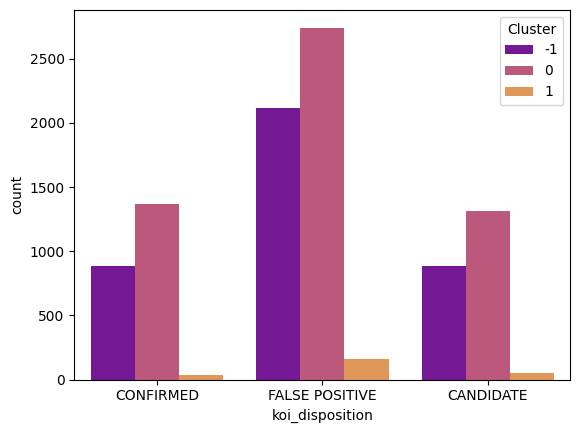

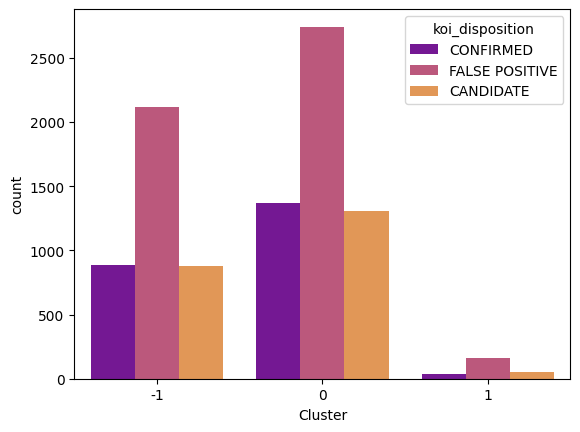

In [ ]:
sns.countplot(x='koi_disposition', hue='Cluster', data=df_final, palette='plasma')
plt.show()

sns.countplot(x='Cluster', hue='koi_disposition', data=df_final, palette='plasma')
plt.show()